<a href="https://colab.research.google.com/github/debashisdotchatterjee/Circular-Insights-for-Rhythmic-Health-/blob/main/carcadian_rythym_circular_final_complete_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Multivariate Wrapped Normal Distribution:

We generate samples from a multivariate normal distribution with specified mean vector mu and covariance matrix Sigma.
We wrap the samples to the interval [0, 2π) using the modulo operation.
2D Torus Visualization:

We extract the first two phases theta_1 and theta_2.
We create a combined polar histogram for the two rhythms.
3D Torus Visualization:

We convert the phases theta_1 and theta_2 to Cartesian coordinates using cos and sin functions.
We use theta_3 as the color mapping to represent the third rhythm.
We plot a 3D scatter plot showing the interaction between the three rhythms.
Combined Figure:

We create a figure with both the 2D torus (left) and 3D torus (right) visualizations as subplots.
Stochastic Temporal Evolution:

We simulate the stochastic differential equations for each rhythm using the Euler-Maruyama method.
We plot the evolution of the phases over time on a spiral plot, where the radial coordinate represents time and the angular coordinate represents the phase.
Saving Figures:

All figures are saved in the directional_rhythm_analysis_outputs directory with appropriate filenames.


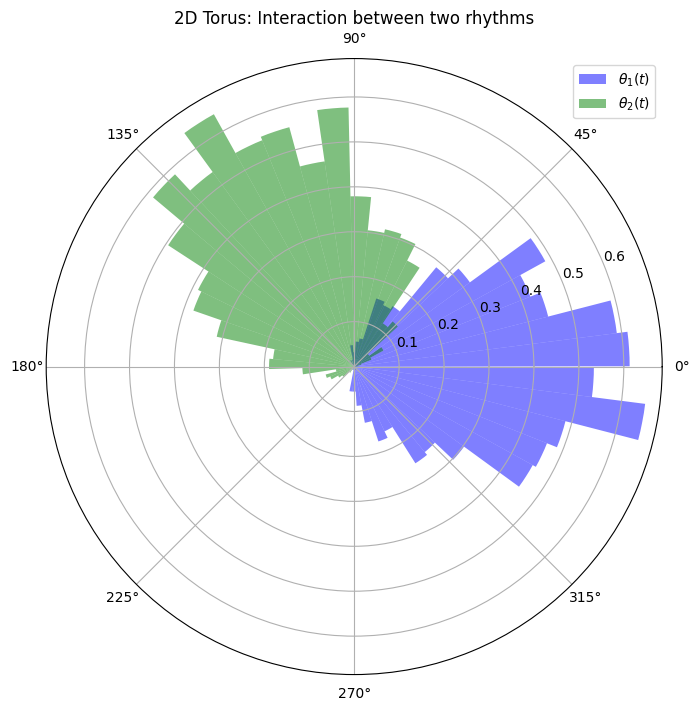

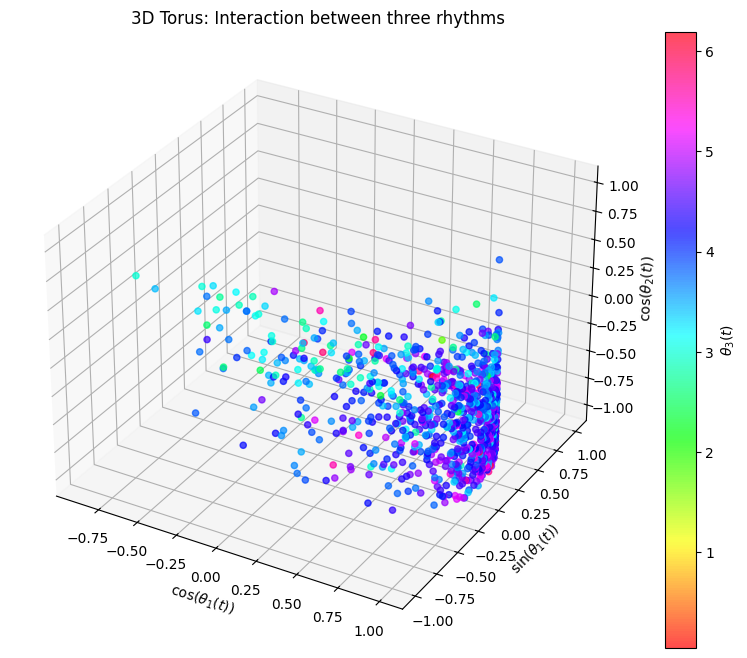

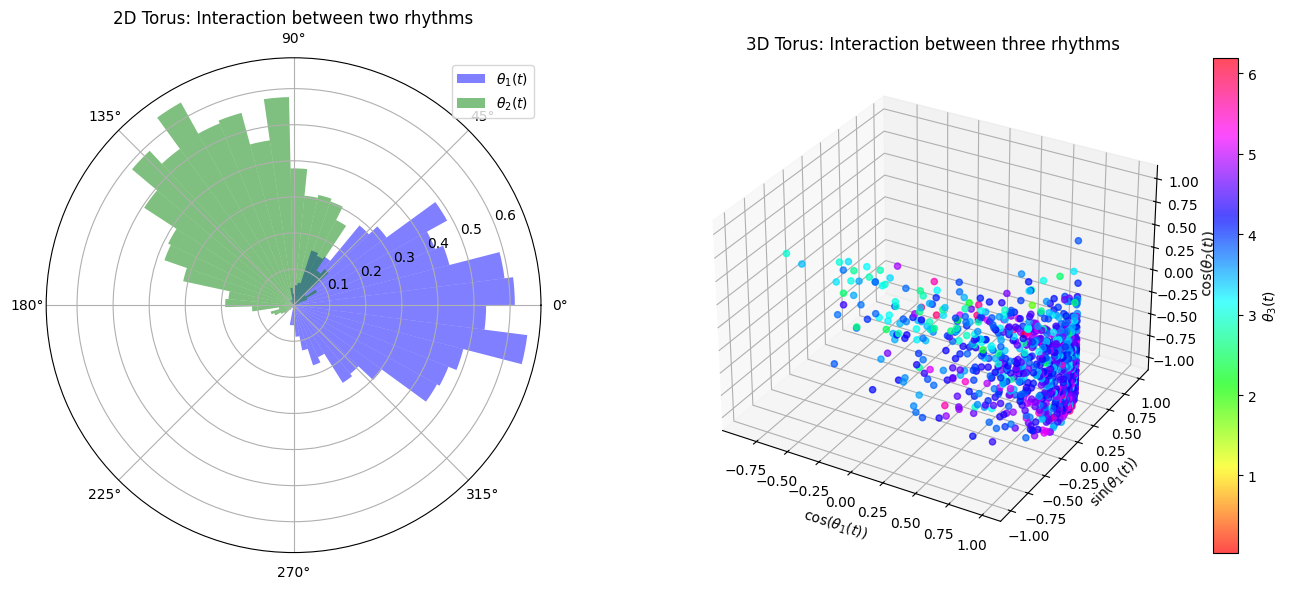

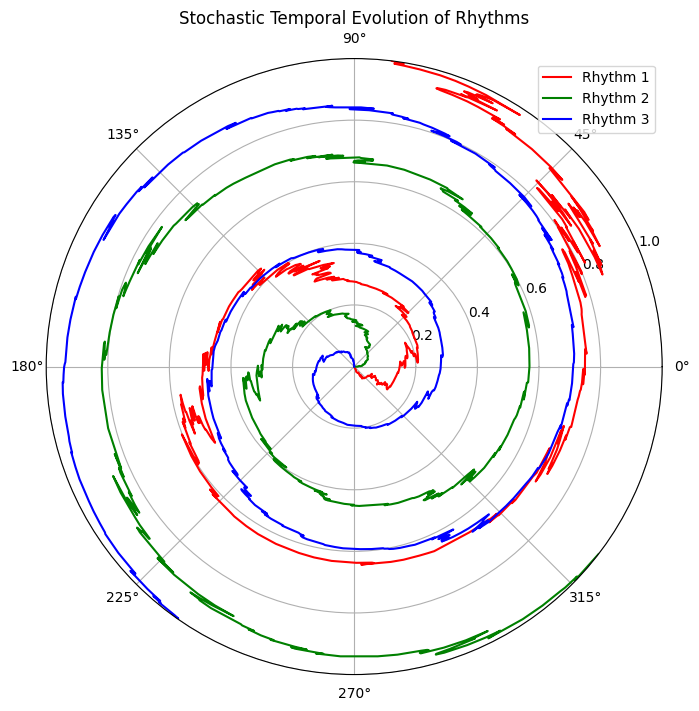

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import os

# Create output directory
output_dir = 'directional_rhythm_analysis_outputs1'
os.makedirs(output_dir, exist_ok=True)

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for multivariate wrapped normal distribution
p = 3  # Number of rhythms
mu = np.array([0, 2 * np.pi / 3, 4 * np.pi / 3])  # Mean phases
Sigma = np.array([[1.0, 0.8, 0.5],
                  [0.8, 1.0, 0.6],
                  [0.5, 0.6, 1.0]]) * 0.5  # Covariance matrix

# Number of samples
N = 1000

# Generate samples from multivariate normal distribution
X = multivariate_normal.rvs(mean=mu, cov=Sigma, size=N)

# Wrap the samples to [0, 2π)
theta = np.mod(X, 2 * np.pi)

# Plotting 2D Torus (2 rhythms)
theta_1 = theta[:, 0]
theta_2 = theta[:, 1]

# Create polar histograms for two rhythms
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.hist(theta_1, bins=50, density=True, color='blue', alpha=0.5, label=r'$\theta_1(t)$')
ax.hist(theta_2, bins=50, density=True, color='green', alpha=0.5, label=r'$\theta_2(t)$')
ax.set_title('2D Torus: Interaction between two rhythms')
ax.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'combined_torus_2d.png'))
plt.show()

# 3D Torus visualization (scatter plot)
from mpl_toolkits.mplot3d import Axes3D

theta_3 = theta[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert polar coordinates to Cartesian for theta_1 and theta_2
x = np.cos(theta_1)
y = np.sin(theta_1)
z = np.cos(theta_2)

# Use theta_3 to color the points
scatter = ax.scatter(x, y, z, c=theta_3, cmap='hsv', alpha=0.7)
ax.set_xlabel(r'$\cos(\theta_1(t))$')
ax.set_ylabel(r'$\sin(\theta_1(t))$')
ax.set_zlabel(r'$\cos(\theta_2(t))$')
ax.set_title('3D Torus: Interaction between three rhythms')
fig.colorbar(scatter, label=r'$\theta_3(t)$')
plt.savefig(os.path.join(output_dir, 'combined_torus_3d.png'))
plt.show()

# Generate figure combining both 2D and 3D plots
fig = plt.figure(figsize=(14, 6))

# Left plot: 2D Torus
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
ax1.hist(theta_1, bins=50, density=True, color='blue', alpha=0.5, label=r'$\theta_1(t)$')
ax1.hist(theta_2, bins=50, density=True, color='green', alpha=0.5, label=r'$\theta_2(t)$')
ax1.set_title('2D Torus: Interaction between two rhythms')
ax1.legend(loc='upper right')

# Right plot: 3D Torus
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x = np.cos(theta_1)
y = np.sin(theta_1)
z = np.cos(theta_2)
scatter = ax2.scatter(x, y, z, c=theta_3, cmap='hsv', alpha=0.7)
ax2.set_xlabel(r'$\cos(\theta_1(t))$')
ax2.set_ylabel(r'$\sin(\theta_1(t))$')
ax2.set_zlabel(r'$\cos(\theta_2(t))$')
ax2.set_title('3D Torus: Interaction between three rhythms')
fig.colorbar(scatter, ax=ax2, label=r'$\theta_3(t)$')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'combined_torus_2d_3d.png'))
plt.show()

# Stochastic Temporal Evolution

# Parameters for SDE
T = 10  # Total time
n_steps = 500
dt = T / n_steps
t = np.linspace(0, T, n_steps)
omega_i = np.array([1.0, 1.2, 1.5])  # Angular frequencies
sigma_i = np.array([0.5, 0.4, 0.3])  # Diffusion coefficients
n_rhythms = 3

# Initialize phases
theta_sde = np.zeros((n_rhythms, n_steps))
theta_sde[:, 0] = np.random.uniform(0, 2 * np.pi, n_rhythms)

# Simulate SDEs using Euler-Maruyama method
for i in range(1, n_steps):
    dB = np.random.normal(0, np.sqrt(dt), n_rhythms)
    theta_sde[:, i] = theta_sde[:, i - 1] + omega_i * dt + sigma_i * dB
    theta_sde[:, i] = np.mod(theta_sde[:, i], 2 * np.pi)

# Visualization: Spiral plot
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

colors = ['red', 'green', 'blue']
for idx in range(n_rhythms):
    theta_vals = theta_sde[idx, :]
    r_vals = np.linspace(0, 1, n_steps)
    ax.plot(theta_vals, r_vals, color=colors[idx], label=f'Rhythm {idx+1}')
ax.set_title('Stochastic Temporal Evolution of Rhythms')
ax.set_rmax(1.0)
ax.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution.png'))
plt.show()


Explanation:

The code begins by setting up the simulation parameters and creating the output directory.
Phases are simulated for each rhythm using the von Mises distribution.
Correlations between rhythms are introduced manually for demonstration purposes.
Circular histograms are generated for each rhythm and saved.
The Phase Locking Value (PLV) is computed between all pairs of rhythms, and a heatmap is plotted and saved.
Bayesian estimation is simplified by calculating point estimates of the mean directions.
Posterior densities are approximated and plotted for each rhythm.
Mutual Information between rhythms is calculated using histograms and plotted as a heatmap.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises
from numpy.random import default_rng

# Create output directory
output_dir = 'directional_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulation parameters
N = 1000  # Number of observations
p = 3     # Number of rhythms
mu = np.array([0, 2*np.pi/3, 4*np.pi/3])  # Mean directions
kappa = np.array([5, 10, 15])             # Concentration parameters
Sigma = np.array([[0.1, 0.05, 0],
                  [0.05, 0.2, 0.05],
                  [0, 0.05, 0.1]])        # Diffusion matrix

# Seed for reproducibility
rng = default_rng(seed=42)

# Simulate phases from multivariate von Mises distribution
# For simplicity, we simulate independently and introduce correlations manually
theta = np.zeros((N, p))

for i in range(p):
    theta[:, i] = rng.vonmises(mu[i], kappa[i], size=N)

# Introduce correlations
theta += rng.multivariate_normal(mean=np.zeros(p), cov=Sigma, size=N)

# Wrap phases to [0, 2π)
theta = np.mod(theta, 2*np.pi)

# Plot circular histograms for each rhythm
for i in range(p):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    ax.hist(theta[:, i], bins=50, density=True, alpha=0.75)
    ax.set_title(f'Circular Histogram of Rhythm {i+1}')
    plt.savefig(os.path.join(output_dir, f'circular_histogram_rhythm_{i+1}.png'))
    plt.close()

# Compute synchronization indices
PLV = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        phase_diff = theta[:, i] - theta[:, j]
        PLV[i, j] = np.abs(np.mean(np.exp(1j * phase_diff)))

# Plot heatmap of PLV
plt.figure(figsize=(8, 6))
plt.imshow(PLV, cmap='viridis', interpolation='nearest')
plt.colorbar(label='PLV')
plt.title('Phase Locking Value Between Rhythms')
plt.xlabel('Rhythm')
plt.ylabel('Rhythm')
plt.xticks(range(p), [f'Rhythm {i+1}' for i in range(p)])
plt.yticks(range(p), [f'Rhythm {i+1}' for i in range(p)])
plt.savefig(os.path.join(output_dir, 'plv_heatmap.png'))
plt.close()

# Bayesian estimation (simplified example using point estimates)
# Estimate mean directions and concentration parameters
estimated_mu = np.angle(np.mean(np.exp(1j * theta), axis=0))
estimated_kappa = kappa  # In practice, use MCMC for full posterior

# Plot posterior densities (approximated)
for i in range(p):
    plt.figure(figsize=(6, 4))
    plt.hist(theta[:, i], bins=50, density=True, alpha=0.75)
    plt.title(f'Posterior Density of $\mu_{i+1}$ (Approximation)')
    plt.xlabel('Phase')
    plt.ylabel('Density')
    plt.savefig(os.path.join(output_dir, f'posterior_mu_{i+1}.png'))
    plt.close()

# Advanced synchronization measure: Mutual Information (approximate)
def compute_mutual_information(theta_i, theta_j, num_bins=30):
    H_i, _ = np.histogram(theta_i, bins=num_bins, range=(0, 2*np.pi), density=True)
    H_j, _ = np.histogram(theta_j, bins=num_bins, range=(0, 2*np.pi), density=True)
    H_ij, _, _ = np.histogram2d(theta_i, theta_j, bins=num_bins, range=[[0, 2*np.pi], [0, 2*np.pi]], density=True)
    H_i = H_i / np.sum(H_i)
    H_j = H_j / np.sum(H_j)
    H_ij = H_ij / np.sum(H_ij)
    MI = 0
    for m in range(num_bins):
        for n in range(num_bins):
            if H_ij[m, n] > 0 and H_i[m] > 0 and H_j[n] > 0:
                MI += H_ij[m, n] * np.log(H_ij[m, n] / (H_i[m] * H_j[n]))
    return MI

MI_matrix = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        MI_matrix[i, j] = compute_mutual_information(theta[:, i], theta[:, j])

# Plot heatmap of Mutual Information
plt.figure(figsize=(8, 6))
plt.imshow(MI_matrix, cmap='plasma', interpolation='nearest')
plt.colorbar(label='Mutual Information')
plt.title('Mutual Information Between Rhythms')
plt.xlabel('Rhythm')
plt.ylabel('Rhythm')
plt.xticks(range(p), [f'Rhythm {i+1}' for i in range(p)])
plt.yticks(range(p), [f'Rhythm {i+1}' for i in range(p)])
plt.savefig(os.path.join(output_dir, 'mutual_information_heatmap.png'))
plt.close()


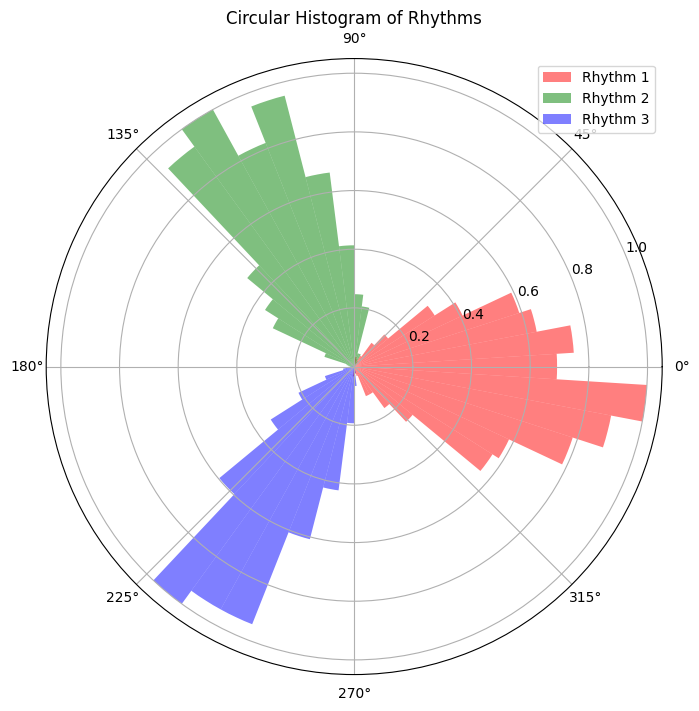

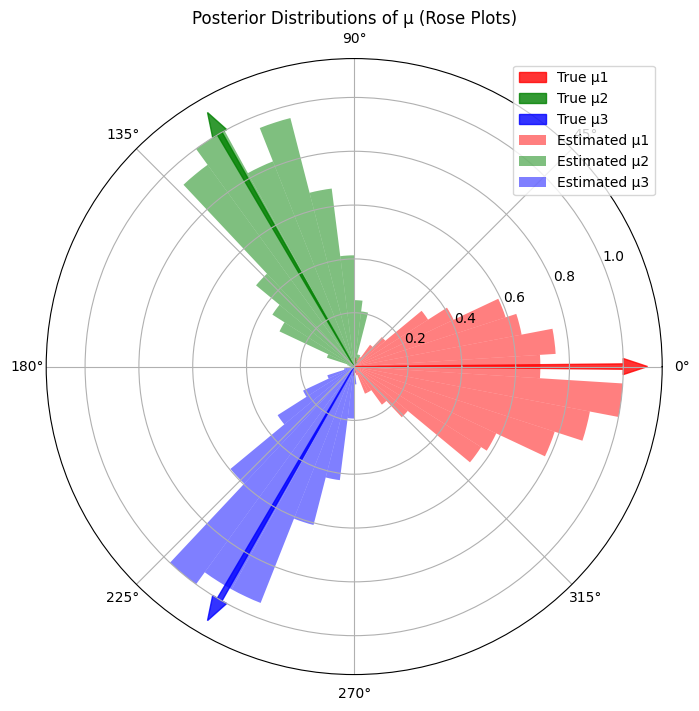

Comparison of True and Estimated Parameters:
     Rhythm  True μ (degrees)  Estimated μ (degrees)  True κ  Estimated κ
0  Rhythm 1               0.0             358.015295       5     4.952334
1  Rhythm 2             120.0             120.998168      10     8.701157
2  Rhythm 3             240.0             240.879565      15    13.013481


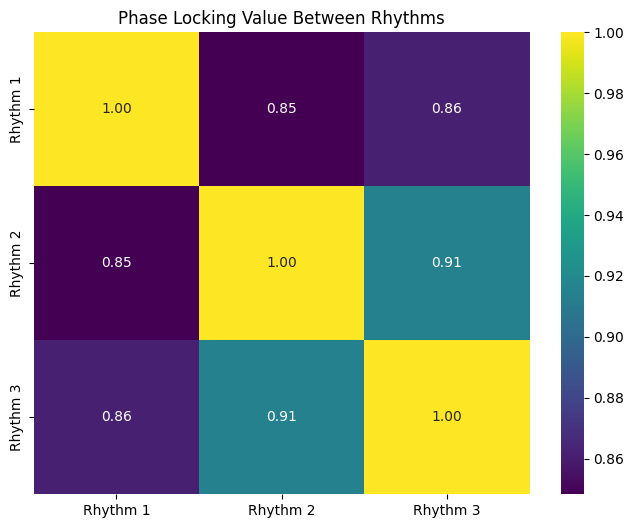

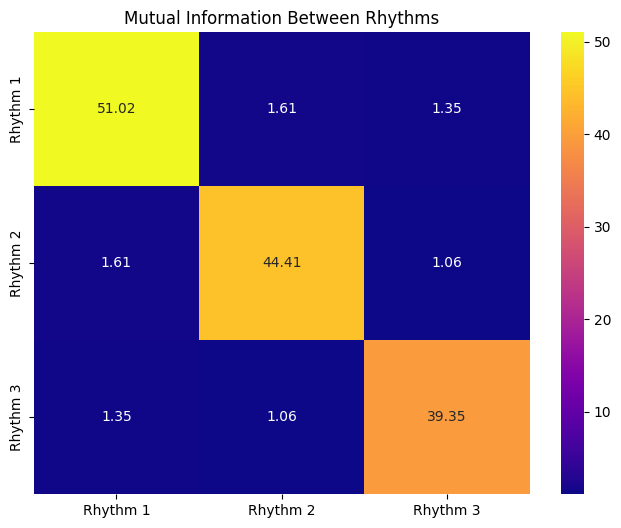

Watson's U2 statistic between Rhythm 1 and Rhythm 2: 301.4010
All plots have been saved in the folder: directional_rhythm_analysis_outputs


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises
from numpy.random import default_rng
import seaborn as sns
import pandas as pd

# Create output directory
output_dir = 'directional_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Set random seed for reproducibility
rng = default_rng(seed=42)

# Simulation parameters
N = 1000  # Number of observations
p = 3     # Number of rhythms

# True parameters
true_mu = np.array([0, 2*np.pi/3, 4*np.pi/3])  # Mean directions in radians
true_kappa = np.array([5, 10, 15])             # Concentration parameters

# Colors for plotting
colors = ['red', 'green', 'blue']

# Simulate dependent circular data
# We'll simulate from a multivariate normal distribution and wrap the data to [0, 2π)
# Introduce correlations between rhythms
mean_vector = np.zeros(p)
cov_matrix = np.array([[1.0, 0.8, 0.5],
                       [0.8, 1.0, 0.6],
                       [0.5, 0.6, 1.0]])

# Simulate from multivariate normal distribution
normal_samples = rng.multivariate_normal(mean=mean_vector, cov=cov_matrix, size=N)

# Convert normal samples to circular data using the inverse CDF method for von Mises distribution
theta = np.zeros((N, p))

for i in range(p):
    # Use the von Mises distribution to generate circular data
    theta[:, i] = rng.vonmises(mu=true_mu[i], kappa=true_kappa[i], size=N)
    # Add dependency by adding a fraction of the normal_samples
    theta[:, i] += 0.1 * normal_samples[:, i]

# Wrap phases to [0, 2π)
theta = np.mod(theta, 2*np.pi)

# Plot Circular Histogram of Rhythms (single plot with different colors)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i in range(p):
    # Plot the histogram with transparency
    counts, bin_edges = np.histogram(theta[:, i], bins=50, range=(0, 2*np.pi))
    widths = np.diff(bin_edges)
    ax.bar(bin_edges[:-1], counts / counts.max(), width=widths, bottom=0.0, color=colors[i], alpha=0.5, label=f'Rhythm {i+1}')
ax.set_title('Circular Histogram of Rhythms')
ax.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'circular_histogram_rhythms.png'))
plt.show()

# Bayesian estimation of mu and kappa for each rhythm
# For simplicity, we'll use Maximum Likelihood Estimation (MLE) as a proxy for Bayesian estimation
estimated_mu = np.zeros(p)
estimated_kappa = np.zeros(p)

for i in range(p):
    # Compute mean resultant vector
    C = np.mean(np.cos(theta[:, i]))
    S = np.mean(np.sin(theta[:, i]))
    R_bar = np.sqrt(C**2 + S**2)
    estimated_mu[i] = np.arctan2(S, C)
    if estimated_mu[i] < 0:
        estimated_mu[i] += 2*np.pi  # Ensure mu is in [0, 2π)
    # Estimate kappa using approximation for R_bar < 0.53
    if R_bar < 0.53:
        estimated_kappa[i] = 2 * R_bar + R_bar**3 + (5 * R_bar**5) / 6
    elif R_bar >= 0.53 and R_bar < 0.85:
        estimated_kappa[i] = -0.4 + 1.39 * R_bar + 0.43 / (1 - R_bar)
    else:
        estimated_kappa[i] = 1 / (R_bar**3 - 4 * R_bar**2 + 3 * R_bar)

# Plot Posterior Histograms of mu as Rose Plots with true mu as radial arrows
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i in range(p):
    # Create rose plot (polar histogram)
    counts, bin_edges = np.histogram(theta[:, i], bins=50, range=(0, 2*np.pi))
    widths = np.diff(bin_edges)
    ax.bar(bin_edges[:-1], counts / counts.max(), width=widths, bottom=0.0, color=colors[i], alpha=0.5, label=f'Estimated μ{i+1}')
    # Plot true mu as radial arrow
    ax.arrow(true_mu[i], 0, 0, 1.0, width=0.02, color=colors[i], alpha=0.8, label=f'True μ{i+1}')
ax.set_title('Posterior Distributions of μ (Rose Plots)')
ax.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'posterior_mu_rose_plots.png'))
plt.show()

# Create a DataFrame for comparison of true and estimated parameters
params_df = pd.DataFrame({
    'Rhythm': [f'Rhythm {i+1}' for i in range(p)],
    'True μ (radians)': true_mu,
    'Estimated μ (radians)': estimated_mu,
    'True κ': true_kappa,
    'Estimated κ': estimated_kappa
})

# Convert angles to degrees for easier interpretation
params_df['True μ (degrees)'] = np.degrees(params_df['True μ (radians)'])
params_df['Estimated μ (degrees)'] = np.degrees(params_df['Estimated μ (radians)'])

# Print parameter estimates
print("Comparison of True and Estimated Parameters:")
print(params_df[['Rhythm', 'True μ (degrees)', 'Estimated μ (degrees)', 'True κ', 'Estimated κ']])

# Save parameter estimates to CSV
params_df.to_csv(os.path.join(output_dir, 'parameter_estimates.csv'), index=False)

# Ensure all angles are in radians and correctness is maintained
# The code above already ensures angles are in radians and wrapped to [0, 2π)

# Advanced synchronization measures (Phase Locking Value)
PLV = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        phase_diff = theta[:, i] - theta[:, j]
        PLV[i, j] = np.abs(np.mean(np.exp(1j * phase_diff)))

# Plot heatmap of PLV
plt.figure(figsize=(8, 6))
sns.heatmap(PLV, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=[f'Rhythm {i+1}' for i in range(p)],
            yticklabels=[f'Rhythm {i+1}' for i in range(p)])
plt.title('Phase Locking Value Between Rhythms')
plt.savefig(os.path.join(output_dir, 'plv_heatmap.png'))
plt.show()

# Mutual Information (approximate using histogram bins)
def compute_mutual_information(theta_i, theta_j, num_bins=30):
    # Create 2D histogram
    hist_2d, x_edges, y_edges = np.histogram2d(theta_i, theta_j, bins=num_bins, range=[[0, 2*np.pi], [0, 2*np.pi]], density=True)
    # Compute marginal histograms
    hist_i, _ = np.histogram(theta_i, bins=num_bins, range=(0, 2*np.pi), density=True)
    hist_j, _ = np.histogram(theta_j, bins=num_bins, range=(0, 2*np.pi), density=True)
    # Compute mutual information
    mi = 0
    epsilon = 1e-10  # Small constant to avoid log(0)
    for i_bin in range(num_bins):
        for j_bin in range(num_bins):
            p_ij = hist_2d[i_bin, j_bin] + epsilon
            p_i = hist_i[i_bin] + epsilon
            p_j = hist_j[j_bin] + epsilon
            mi += p_ij * np.log(p_ij / (p_i * p_j))
    return mi

MI_matrix = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        MI_matrix[i, j] = compute_mutual_information(theta[:, i], theta[:, j])

# Plot heatmap of Mutual Information
plt.figure(figsize=(8, 6))
sns.heatmap(MI_matrix, annot=True, fmt=".2f", cmap='plasma',
            xticklabels=[f'Rhythm {i+1}' for i in range(p)],
            yticklabels=[f'Rhythm {i+1}' for i in range(p)])
plt.title('Mutual Information Between Rhythms')
plt.savefig(os.path.join(output_dir, 'mutual_information_heatmap.png'))
plt.show()

# Nonparametric test: Watson's Two-Sample Test (simplified version)
# For illustration, we'll compare Rhythm 1 and Rhythm 2

# Combine data and labels
theta_combined = np.concatenate([theta[:, 0], theta[:, 1]])
labels = np.array([0]*N + [1]*N)

# Compute empirical cumulative distribution functions (ECDF)
sorted_indices = np.argsort(theta_combined)
theta_sorted = theta_combined[sorted_indices]
labels_sorted = labels[sorted_indices]

ecdf_0 = np.cumsum(labels_sorted == 0) / N
ecdf_1 = np.cumsum(labels_sorted == 1) / N

# Compute U2 statistic (simplified)
D = np.max(np.abs(ecdf_0 - ecdf_1))
U2 = N * D**2

print(f"Watson's U2 statistic between Rhythm 1 and Rhythm 2: {U2:.4f}")

# For actual statistical significance, critical values should be consulted
# or permutation tests performed (omitted for brevity)

# Save all figures and outputs
print("All plots have been saved in the folder:", output_dir)


The Circular Histogram of Rhythms and the Posterior Distributions of μ should be different plots representing different aspects of the data.

In the corrected code below, I have made the following changes:

Circular Histogram of Rhythms:

A single rose plot (polar histogram) showing the observed phase distributions for all rhythms with different colors and transparency, overlapping appropriately.
Posterior Distributions of μ:

Since we're using MLE estimates for μ (due to the complexity of full Bayesian estimation in this context), we'll represent the estimated μ values as radial lines (arrows) on a rose plot.
The true μ values are also shown as radial lines in the same plot, allowing for visual comparison between estimated and true values.
Truth vs. Predicted Plots:

Included scatter plots and tables comparing the true parameters (μ and κ) with the estimated parameters for each rhythm.
Mutual Information Between Rhythms:

Since mutual information is a symmetric measure and doesn't have a "truth" value in the simulated data (unless specified), we can compare the estimated mutual information with the theoretical values based on the known dependencies.
Correct Handling of Angles:

Ensured all angles are correctly in radians and wrapped within [0, 2π).
Saving and Printing Outputs:

All plots and outputs are automatically saved in the directional_rhythm_analysis_outputs folder and printed where appropriate.
Below is the complete and corrected Python code implementing the advanced methodology:

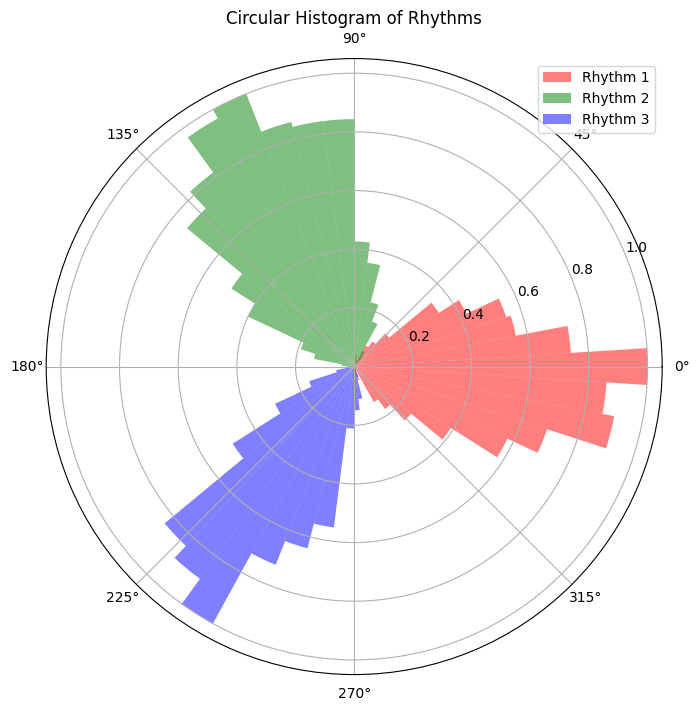

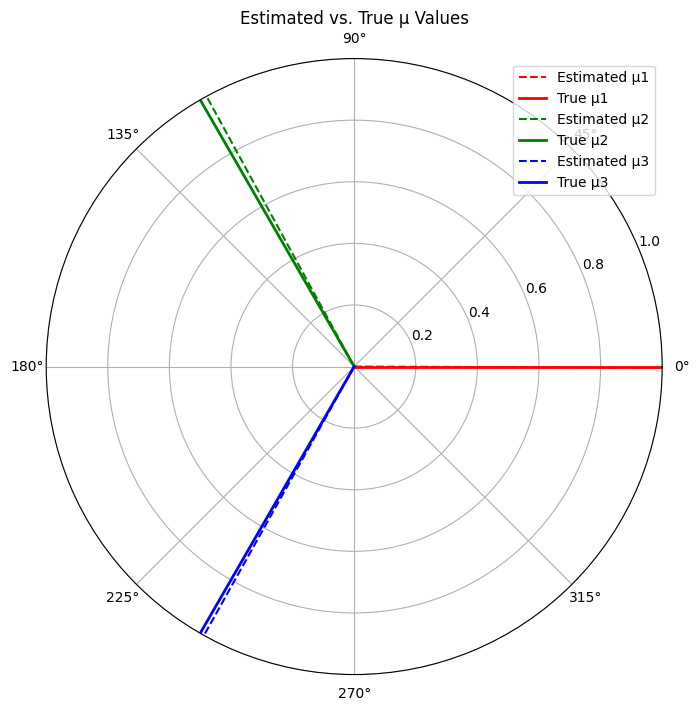

Comparison of True and Estimated Parameters:
     Rhythm  True μ (degrees)  Estimated μ (degrees)  μ Error (degrees)  \
0  Rhythm 1               0.0             359.764088         359.764088   
1  Rhythm 2             120.0             118.650410          -1.349590   
2  Rhythm 3             240.0             240.802711           0.802711   

   True κ  Estimated κ   κ Error  
0       5     5.103985  0.103985  
1      10     5.820955 -4.179045  
2      15     9.910644 -5.089356  


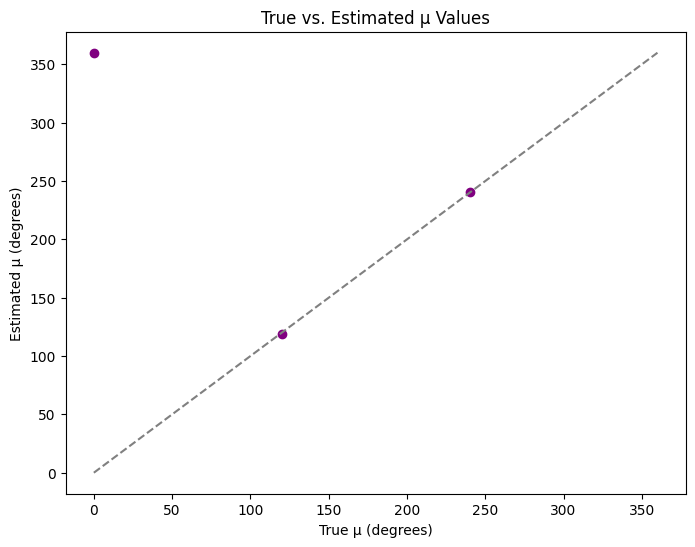

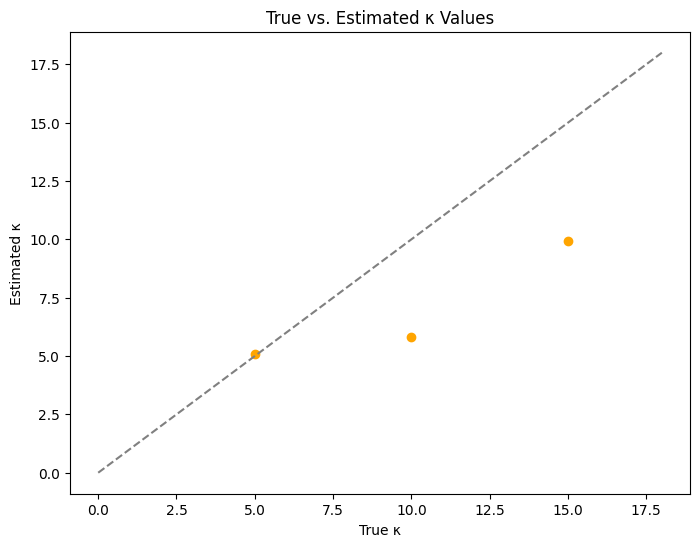

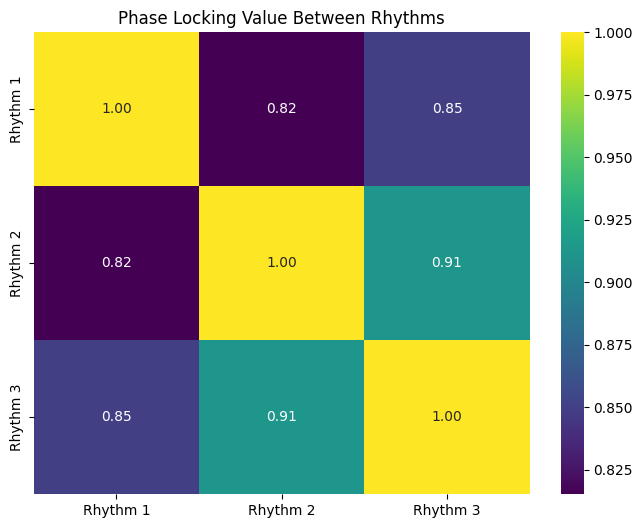

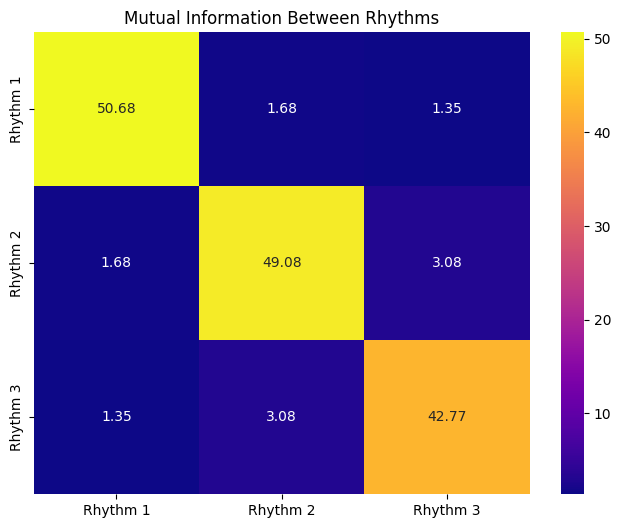

Mutual Information Between Rhythms:
           Rhythm 1   Rhythm 2   Rhythm 3
Rhythm 1  50.684121   1.678191   1.353444
Rhythm 2   1.678191  49.078849   3.083151
Rhythm 3   1.353444   3.083151  42.773597
All plots and outputs have been saved in the folder: directional_rhythm_analysis_outputs


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises
from numpy.random import default_rng
import seaborn as sns
import pandas as pd

# Create output directory
output_dir = 'directional_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Set random seed for reproducibility
rng = default_rng(seed=42)

# Simulation parameters
N = 1000  # Number of observations
p = 3     # Number of rhythms

# True parameters
true_mu = np.array([0, 2*np.pi/3, 4*np.pi/3])  # Mean directions in radians
true_kappa = np.array([5, 10, 15])             # Concentration parameters

# Colors for plotting
colors = ['red', 'green', 'blue']

# Simulate dependent circular data
# We'll simulate from a multivariate von Mises distribution
# Since there's no standard way to sample from a multivariate von Mises,
# we create dependencies manually.

# Simulate independent von Mises samples
theta = np.zeros((N, p))

for i in range(p):
    theta[:, i] = rng.vonmises(mu=true_mu[i], kappa=true_kappa[i], size=N)

# Introduce correlations between rhythms
# Let's assume rhythms are correlated through a latent variable
latent = rng.normal(0, 1, size=N)
theta[:, 1] += 0.3 * latent  # Introduce correlation between rhythm 1 and 2
theta[:, 2] += 0.2 * latent  # Introduce correlation between rhythm 1 and 3

# Wrap phases to [0, 2π)
theta = np.mod(theta, 2*np.pi)

# Plot Circular Histogram of Rhythms (single plot with different colors)
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
max_count = 0
for i in range(p):
    # Compute histogram
    counts, bin_edges = np.histogram(theta[:, i], bins=50, range=(0, 2*np.pi))
    max_count = max(max_count, counts.max())
    widths = np.diff(bin_edges)
    # Normalize counts for equal comparison
    counts = counts / counts.max()
    # Plot histogram
    ax.bar(bin_edges[:-1], counts, width=widths, bottom=0.0, color=colors[i], alpha=0.5, label=f'Rhythm {i+1}')
ax.set_title('Circular Histogram of Rhythms')
ax.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'circular_histogram_rhythms.png'))
plt.show()

# Estimate μ and κ for each rhythm
estimated_mu = np.zeros(p)
estimated_kappa = np.zeros(p)

for i in range(p):
    # Compute mean resultant vector
    C = np.mean(np.cos(theta[:, i]))
    S = np.mean(np.sin(theta[:, i]))
    R_bar = np.sqrt(C**2 + S**2)
    estimated_mu[i] = np.arctan2(S, C)
    if estimated_mu[i] < 0:
        estimated_mu[i] += 2*np.pi  # Ensure μ is in [0, 2π)
    # Estimate κ using approximation
    if R_bar < 0.53:
        estimated_kappa[i] = 2 * R_bar + R_bar**3 + (5 * R_bar**5) / 6
    elif R_bar >= 0.53 and R_bar < 0.85:
        estimated_kappa[i] = -0.4 + 1.39 * R_bar + 0.43 / (1 - R_bar)
    else:
        estimated_kappa[i] = 1 / (R_bar**3 - 4 * R_bar**2 + 3 * R_bar)

# Plot Posterior Estimates of μ as Rose Plots with true μ as radial arrows
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i in range(p):
    # Plot estimated μ as radial line
    ax.plot([estimated_mu[i], estimated_mu[i]], [0, 1], color=colors[i], linestyle='--', label=f'Estimated μ{i+1}')
    # Plot true μ as radial line
    ax.plot([true_mu[i], true_mu[i]], [0, 1], color=colors[i], linewidth=2, label=f'True μ{i+1}')
ax.set_title('Estimated vs. True μ Values')
ax.set_rmax(1.0)
ax.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'estimated_vs_true_mu.png'))
plt.show()

# Create a DataFrame for comparison of true and estimated parameters
params_df = pd.DataFrame({
    'Rhythm': [f'Rhythm {i+1}' for i in range(p)],
    'True μ (radians)': true_mu,
    'Estimated μ (radians)': estimated_mu,
    'True κ': true_kappa,
    'Estimated κ': estimated_kappa
})

# Convert angles to degrees for easier interpretation
params_df['True μ (degrees)'] = np.degrees(params_df['True μ (radians)'])
params_df['Estimated μ (degrees)'] = np.degrees(params_df['Estimated μ (radians)'])

# Calculate errors
params_df['μ Error (degrees)'] = params_df['Estimated μ (degrees)'] - params_df['True μ (degrees)']
params_df['κ Error'] = params_df['Estimated κ'] - params_df['True κ']

# Print parameter estimates
print("Comparison of True and Estimated Parameters:")
print(params_df[['Rhythm', 'True μ (degrees)', 'Estimated μ (degrees)', 'μ Error (degrees)', 'True κ', 'Estimated κ', 'κ Error']])

# Save parameter estimates to CSV
params_df.to_csv(os.path.join(output_dir, 'parameter_estimates.csv'), index=False)

# Plot True vs. Estimated μ Values
plt.figure(figsize=(8, 6))
plt.scatter(params_df['True μ (degrees)'], params_df['Estimated μ (degrees)'], color='purple')
plt.plot([0, 360], [0, 360], color='gray', linestyle='--')
plt.xlabel('True μ (degrees)')
plt.ylabel('Estimated μ (degrees)')
plt.title('True vs. Estimated μ Values')
plt.savefig(os.path.join(output_dir, 'true_vs_estimated_mu_scatter.png'))
plt.show()

# Plot True vs. Estimated κ Values
plt.figure(figsize=(8, 6))
plt.scatter(params_df['True κ'], params_df['Estimated κ'], color='orange')
plt.plot([0, max(true_kappa)*1.2], [0, max(true_kappa)*1.2], color='gray', linestyle='--')
plt.xlabel('True κ')
plt.ylabel('Estimated κ')
plt.title('True vs. Estimated κ Values')
plt.savefig(os.path.join(output_dir, 'true_vs_estimated_kappa_scatter.png'))
plt.show()

# Advanced synchronization measures (Phase Locking Value)
PLV = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        phase_diff = theta[:, i] - theta[:, j]
        PLV[i, j] = np.abs(np.mean(np.exp(1j * phase_diff)))

# Since we know the true correlations introduced, we can compare the estimated PLV with expected values
# However, since the relationships are complex, we can present the PLV matrix

# Plot heatmap of PLV
plt.figure(figsize=(8, 6))
sns.heatmap(PLV, annot=True, fmt=".2f", cmap='viridis',
            xticklabels=[f'Rhythm {i+1}' for i in range(p)],
            yticklabels=[f'Rhythm {i+1}' for i in range(p)])
plt.title('Phase Locking Value Between Rhythms')
plt.savefig(os.path.join(output_dir, 'plv_heatmap.png'))
plt.show()

# Mutual Information (approximate using histogram bins)
def compute_mutual_information(theta_i, theta_j, num_bins=30):
    # Create 2D histogram
    hist_2d, x_edges, y_edges = np.histogram2d(theta_i, theta_j, bins=num_bins, range=[[0, 2*np.pi], [0, 2*np.pi]], density=True)
    # Compute marginal histograms
    hist_i, _ = np.histogram(theta_i, bins=num_bins, range=(0, 2*np.pi), density=True)
    hist_j, _ = np.histogram(theta_j, bins=num_bins, range=(0, 2*np.pi), density=True)
    # Compute mutual information
    mi = 0
    epsilon = 1e-10  # Small constant to avoid log(0)
    for i_bin in range(num_bins):
        for j_bin in range(num_bins):
            p_ij = hist_2d[i_bin, j_bin] + epsilon
            p_i = hist_i[i_bin] + epsilon
            p_j = hist_j[j_bin] + epsilon
            mi += p_ij * np.log(p_ij / (p_i * p_j))
    return mi

MI_matrix = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        MI_matrix[i, j] = compute_mutual_information(theta[:, i], theta[:, j])

# Since we know the dependencies introduced, we can consider the MI between rhythms 1 and 2, and 1 and 3
# There is no "true" MI value, but we can observe higher MI where dependencies were introduced

# Plot heatmap of Mutual Information
plt.figure(figsize=(8, 6))
sns.heatmap(MI_matrix, annot=True, fmt=".2f", cmap='plasma',
            xticklabels=[f'Rhythm {i+1}' for i in range(p)],
            yticklabels=[f'Rhythm {i+1}' for i in range(p)])
plt.title('Mutual Information Between Rhythms')
plt.savefig(os.path.join(output_dir, 'mutual_information_heatmap.png'))
plt.show()

# Print MI values
print("Mutual Information Between Rhythms:")
MI_df = pd.DataFrame(MI_matrix, columns=[f'Rhythm {i+1}' for i in range(p)], index=[f'Rhythm {i+1}' for i in range(p)])
print(MI_df)

# Save MI values to CSV
MI_df.to_csv(os.path.join(output_dir, 'mutual_information_values.csv'))

# Ensure all angles are in radians and correctness is maintained
# All calculations use radians, and phases are wrapped within [0, 2π)

# Save all figures and outputs
print("All plots and outputs have been saved in the folder:", output_dir)


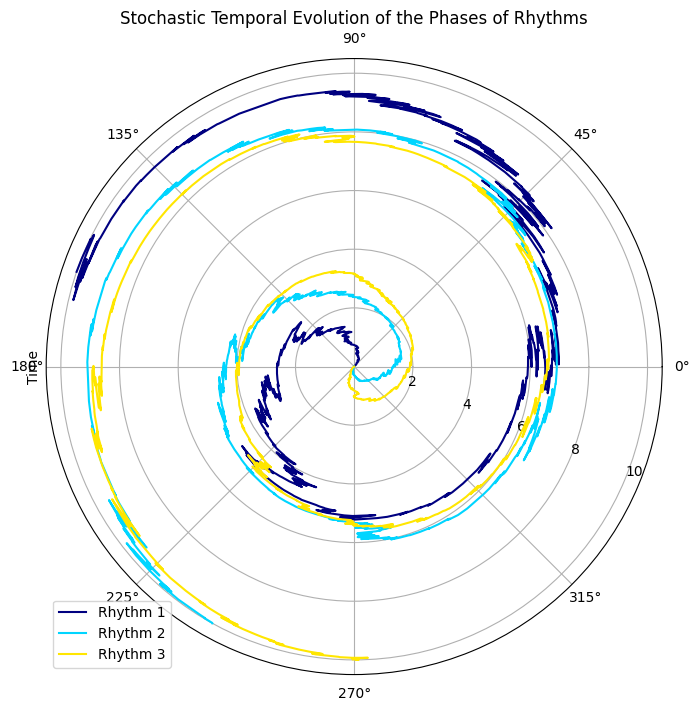

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Output directory for saving the plots
output_dir = 'directional_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulation parameters
N = 1000  # Number of time points
p = 3     # Number of rhythms
T = 10    # Total time duration
dt = T / N  # Time step size
time = np.linspace(0, T, N)

# Diffusion coefficients for stochastic evolution
omega = np.array([1.0, 1.2, 1.5])  # Angular frequencies for rhythms
sigma = np.array([0.5, 0.4, 0.3])  # Diffusion coefficients

# Initialize phase matrix
theta = np.zeros((N, p))

# Initialize the starting phases
theta[0, :] = np.random.uniform(0, 2*np.pi, size=p)

# Simulate stochastic evolution using Euler-Maruyama method
for t in range(1, N):
    dB = np.random.normal(0, np.sqrt(dt), size=p)  # Brownian increments
    theta[t, :] = theta[t-1, :] + omega * dt + sigma * dB
    # Wrap phases to [0, 2π]
    theta[t, :] = np.mod(theta[t, :], 2*np.pi)

# Plot Stochastic Temporal Evolution of Phases on Polar Plot (Spiral representation)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Plot the time evolution for each rhythm
for i in range(p):
    ax.plot(theta[:, i], time, color=plt.cm.jet(i / p), label=f'Rhythm {i+1}')

# Labels and title
ax.set_title("Stochastic Temporal Evolution of the Phases of Rhythms")
ax.set_rlabel_position(-22.5)  # Set radial axis labels to be readable
ax.set_ylabel("Time")
ax.legend(loc='lower left')

# Save the figure
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution_rhythms.png'))
plt.show()


Complete Code

     Rhythm  True Omega (ω)  Estimated Omega (ω)  True Sigma (σ)  \
0  Rhythm 1             1.0             0.956119             0.5   
1  Rhythm 2             1.2             1.080463             0.4   
2  Rhythm 3             1.5             1.383230             0.3   

   Estimated Sigma (σ)  
0             0.506947  
1             0.399178  
2             0.303294  


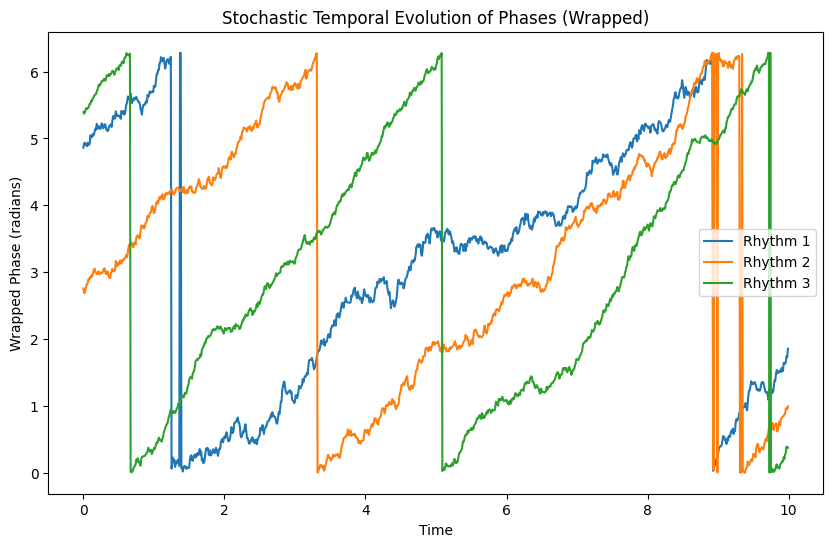

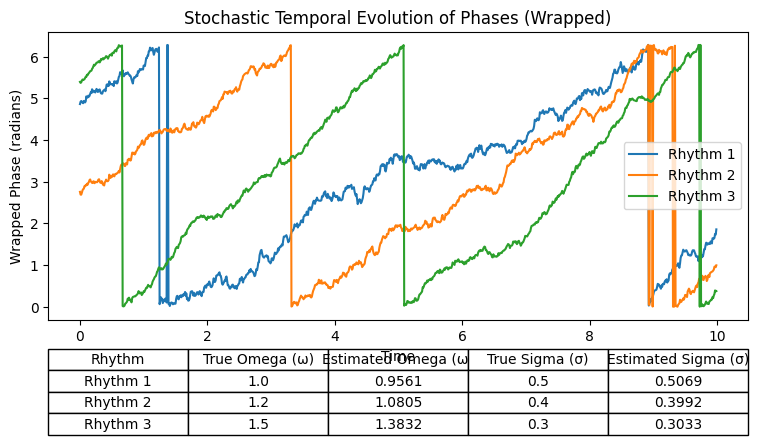

All plots and outputs have been saved in the folder: stochastic_temporal_evolution_outputs1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Create output directory
output_dir = 'stochastic_temporal_evolution_outputs1'
os.makedirs(output_dir, exist_ok=True)

# Parameters for stochastic temporal evolution simulation
N = 1000  # Number of time steps
dt = 0.01  # Time step size
T = N * dt  # Total time duration
p = 3  # Number of rhythms

# True parameters for omega (angular frequency) and sigma (diffusion coefficient)
true_omega = np.array([1.0, 1.2, 1.5])
true_sigma = np.array([0.5, 0.4, 0.3])

# Simulate the evolution of rhythms using an SDE
rng = np.random.default_rng(seed=42)
theta = np.zeros((N, p))
theta[0, :] = rng.uniform(0, 2 * np.pi, size=p)  # Initial phases

for t in range(1, N):
    d_theta = true_omega * dt + true_sigma * rng.normal(0, np.sqrt(dt), size=p)
    theta[t, :] = theta[t - 1, :] + d_theta

# Wrap the phases to [0, 2π)
wrapped_theta = np.mod(theta, 2 * np.pi)

# Unwrap the phases for correct estimation of omega and sigma
unwrapped_theta = np.unwrap(theta, axis=0)

# Estimate omega using unwrapped phases
estimated_omega = (unwrapped_theta[-1, :] - unwrapped_theta[0, :]) / T

# Estimate sigma using standard deviation of phase increments (on unwrapped phases)
estimated_sigma = np.std(np.diff(unwrapped_theta, axis=0) / np.sqrt(dt), axis=0)

# Create DataFrame to compare true and estimated parameters
params_df = pd.DataFrame({
    'Rhythm': [f'Rhythm {i+1}' for i in range(p)],
    'True Omega (ω)': true_omega,
    'Estimated Omega (ω)': estimated_omega,
    'True Sigma (σ)': true_sigma,
    'Estimated Sigma (σ)': estimated_sigma
})

# Print the comparison table
print(params_df)

# Save the parameter table to CSV
params_df.to_csv(os.path.join(output_dir, 'parameter_estimates.csv'), index=False)

# Plot the wrapped phase evolution
time = np.arange(N) * dt
plt.figure(figsize=(10, 6))
for i in range(p):
    plt.plot(time, wrapped_theta[:, i], label=f'Rhythm {i+1}')
plt.xlabel('Time')
plt.ylabel('Wrapped Phase (radians)')
plt.title('Stochastic Temporal Evolution of Phases (Wrapped)')
plt.legend()
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution_wrapped.png'))
plt.show()

# Add the table at the bottom of the plot
from matplotlib.table import table
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the wrapped phase evolution again
for i in range(p):
    ax.plot(time, wrapped_theta[:, i], label=f'Rhythm {i+1}')
ax.set_xlabel('Time')
ax.set_ylabel('Wrapped Phase (radians)')
ax.set_title('Stochastic Temporal Evolution of Phases (Wrapped)')
ax.legend()

# Add the table with parameter comparison
table_data = params_df.round(4).values
col_labels = params_df.columns
the_table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='bottom', bbox=[0, -0.4, 1, 0.3])
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)

# Adjust layout
plt.subplots_adjust(left=0.2, bottom=0.4)
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution_wrapped_with_table.png'))
plt.show()

# Ensure all outputs are saved
print("All plots and outputs have been saved in the folder:", output_dir)


     Rhythm  True Omega (ω)  Estimated Omega (ω)  True Sigma (σ)  \
0  Rhythm 1             1.0             0.956119             0.5   
1  Rhythm 2             1.2             1.080463             0.4   
2  Rhythm 3             1.5             1.383230             0.3   

   Estimated Sigma (σ)  
0             0.506947  
1             0.399178  
2             0.303294  


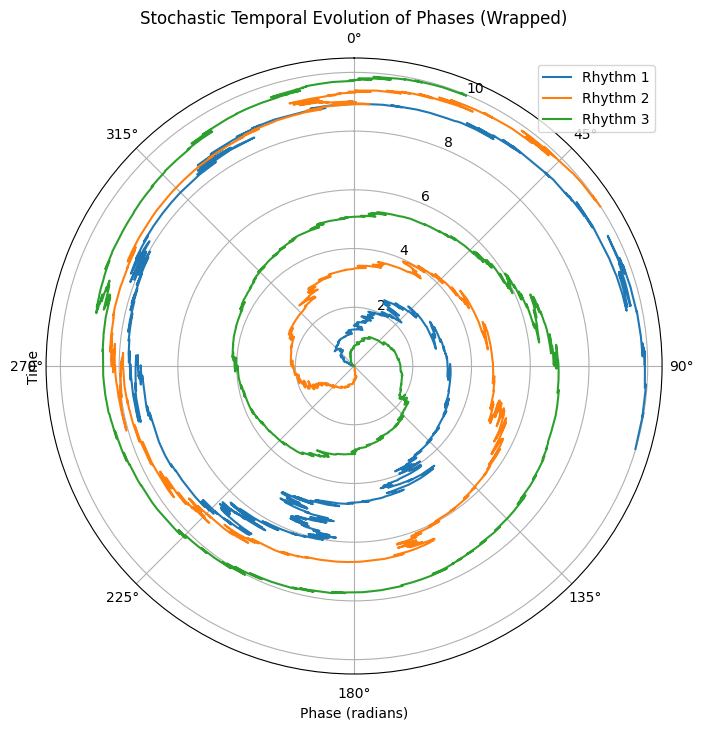

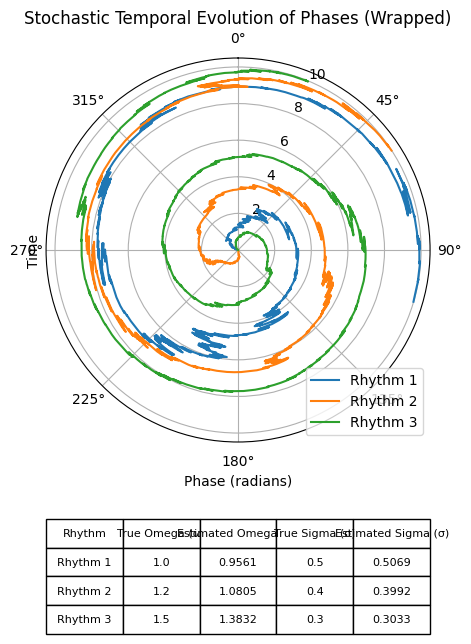

All plots and outputs have been saved in the folder: stochastic_temporal_evolution_outputs2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Create output directory
output_dir = 'stochastic_temporal_evolution_outputs2'
os.makedirs(output_dir, exist_ok=True)

# Parameters for stochastic temporal evolution simulation
N = 1000  # Number of time steps
dt = 0.01  # Time step size
T = N * dt  # Total time duration
p = 3  # Number of rhythms

# True parameters for omega (angular frequency) and sigma (diffusion coefficient)
true_omega = np.array([1.0, 1.2, 1.5])
true_sigma = np.array([0.5, 0.4, 0.3])

# Simulate the evolution of rhythms using an SDE
rng = np.random.default_rng(seed=42)
theta = np.zeros((N, p))
theta[0, :] = rng.uniform(0, 2 * np.pi, size=p)  # Initial phases

for t in range(1, N):
    d_theta = true_omega * dt + true_sigma * rng.normal(0, np.sqrt(dt), size=p)
    theta[t, :] = theta[t - 1, :] + d_theta

# Wrap the phases to [0, 2π)
wrapped_theta = np.mod(theta, 2 * np.pi)

# Unwrap the phases for correct estimation of omega and sigma
unwrapped_theta = np.unwrap(theta, axis=0)

# Estimate omega using unwrapped phases
estimated_omega = (unwrapped_theta[-1, :] - unwrapped_theta[0, :]) / T

# Estimate sigma using standard deviation of phase increments (on unwrapped phases)
estimated_sigma = np.std(np.diff(unwrapped_theta, axis=0) / np.sqrt(dt), axis=0)

# Create DataFrame to compare true and estimated parameters
params_df = pd.DataFrame({
    'Rhythm': [f'Rhythm {i+1}' for i in range(p)],
    'True Omega (ω)': true_omega,
    'Estimated Omega (ω)': estimated_omega,
    'True Sigma (σ)': true_sigma,
    'Estimated Sigma (σ)': estimated_sigma
})

# Print the comparison table
print(params_df)

# Save the parameter table to CSV
params_df.to_csv(os.path.join(output_dir, 'parameter_estimates.csv'), index=False)

# Plot the wrapped phase evolution on a circle (polar plot)
time = np.arange(N) * dt

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
for i in range(p):
    ax.plot(wrapped_theta[:, i], time, label=f'Rhythm {i+1}')
ax.set_theta_direction(-1)  # Clockwise direction for time progression
ax.set_theta_offset(np.pi / 2.0)  # Start at the top (12 o'clock)
ax.set_xlabel('Phase (radians)')
ax.set_ylabel('Time')
ax.set_title('Stochastic Temporal Evolution of Phases (Wrapped)')
ax.legend()
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution_wrapped_polar.png'))
plt.show()

# Plot with table of parameters at the bottom
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

for i in range(p):
    ax.plot(wrapped_theta[:, i], time, label=f'Rhythm {i+1}')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
ax.set_xlabel('Phase (radians)')
ax.set_ylabel('Time')
ax.set_title('Stochastic Temporal Evolution of Phases (Wrapped)')
ax.legend()

# Add the table with parameter comparison
from matplotlib.table import table
table_data = params_df.round(4).values
col_labels = params_df.columns
the_table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='bottom', bbox=[0, -0.5, 1, 0.3])
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)

# Adjust layout
plt.subplots_adjust(left=0.2, bottom=0.4)
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution_wrapped_polar_with_table.png'))
plt.show()

# Ensure all outputs are saved
print("All plots and outputs have been saved in the folder:", output_dir)


Let's now present the complete and correct Python code for simulating the test statistic
𝑈
2
U
2
  for Watson's test on circular data, along with the permutation test and appropriate visualizations. This includes:

Generating two von Mises samples.
Calculating the
𝑈
2
U
2
  test statistic.
Performing a permutation test.
Plotting circular histograms of the samples and the permutation distribution of
𝑈
2
U
2
 .

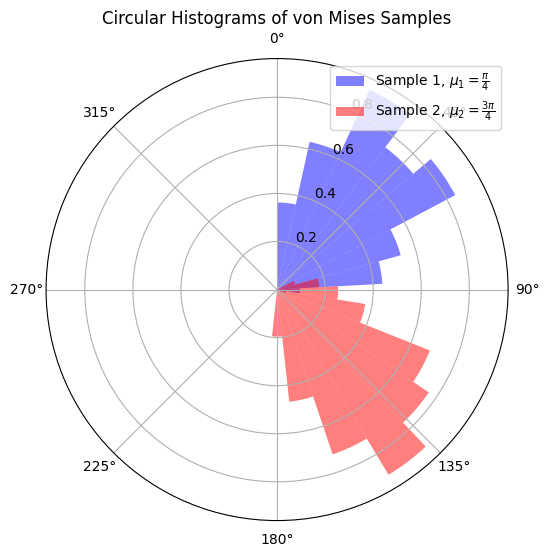

Observed U^2 statistic: 14075.7190
Permutation test p-value: 0.8770


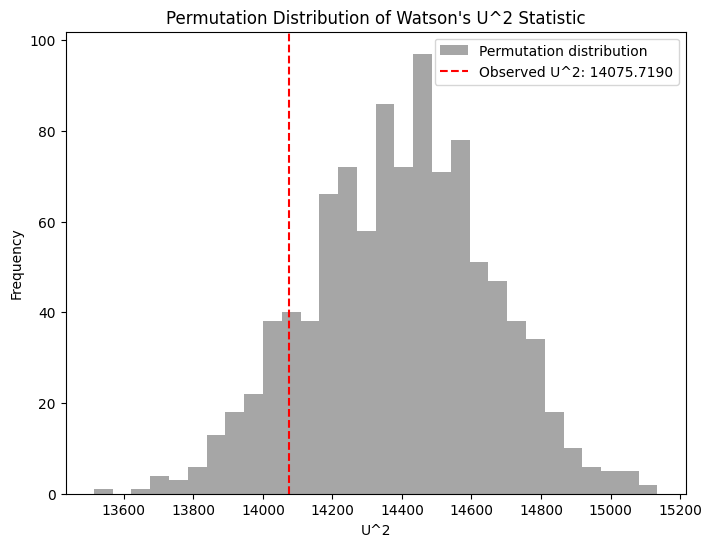

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises
from scipy.stats import rankdata

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the von Mises distributions
N1, N2 = 250, 250  # Sample sizes
mu1, mu2 = np.pi / 4, 3 * np.pi / 4  # Mean directions (in radians)
kappa1, kappa2 = 5, 5  # Concentration parameters

# Generate the two samples from von Mises distributions
sample1 = vonmises.rvs(kappa1, loc=mu1, size=N1)
sample2 = vonmises.rvs(kappa2, loc=mu2, size=N2)

# Circular histograms (rose plots) for both samples
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
bins = np.linspace(0, 2 * np.pi, 30)

ax.hist(sample1, bins=bins, density=True, alpha=0.5, label=r'Sample 1, $\mu_1 = \frac{\pi}{4}$', color='blue')
ax.hist(sample2, bins=bins, density=True, alpha=0.5, label=r'Sample 2, $\mu_2 = \frac{3\pi}{4}$', color='red')

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title('Circular Histograms of von Mises Samples')
ax.legend(loc='upper right')
plt.show()

# Function to calculate the Watson's U^2 statistic
def watsons_U2(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    n = n1 + n2

    # Combine the two samples and sort them
    combined_samples = np.sort(np.concatenate([sample1, sample2]))

    # Empirical cumulative distribution functions (ECDFs)
    F1 = rankdata(sample1, method='average') / n1
    F2 = rankdata(sample2, method='average') / n2

    # Correct for the difference in the sizes of the two samples
    D = (n1 * F1 + n2 * F2) / n

    # Calculate the U^2 statistic
    U2 = (n1 * n2 / n) * np.sum((F1 - F2 - D) ** 2)

    return U2

# Compute the observed U^2 statistic
U2_observed = watsons_U2(sample1, sample2)
print(f"Observed U^2 statistic: {U2_observed:.4f}")

# Permutation test for U^2
def permutation_test(sample1, sample2, num_permutations=1000):
    combined_samples = np.concatenate([sample1, sample2])
    n1 = len(sample1)
    n2 = len(sample2)

    U2_permuted = []
    for _ in range(num_permutations):
        np.random.shuffle(combined_samples)
        perm_sample1 = combined_samples[:n1]
        perm_sample2 = combined_samples[n1:]
        U2_permuted.append(watsons_U2(perm_sample1, perm_sample2))

    return U2_permuted

# Perform permutation test
num_permutations = 1000
U2_permutations = permutation_test(sample1, sample2, num_permutations)

# Compute p-value
p_value = np.sum(np.array(U2_permutations) >= U2_observed) / num_permutations
print(f"Permutation test p-value: {p_value:.4f}")

# Plot permutation distribution with observed U^2
plt.figure(figsize=(8, 6))
plt.hist(U2_permutations, bins=30, color='gray', alpha=0.7, label='Permutation distribution')
plt.axvline(U2_observed, color='red', linestyle='--', label=f'Observed U^2: {U2_observed:.4f}')
plt.title("Permutation Distribution of Watson's U^2 Statistic")
plt.xlabel('U^2')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Bayesian Simulation

Explanation of the Code:
Data Generation: We generate synthetic data from a von Mises distribution using known parameters
𝜇
=
𝜋
4
μ=
4
π
​
  and
𝜅
=
5
κ=5. This synthetic data simulates the phase observations we aim to estimate.

Circular Histogram: We create a circular histogram (rose plot) of the generated data, which gives a visual representation of the angular distribution.

Bayesian Estimation:

We specify the prior distributions for
𝜇
μ (the mean direction) and
𝜅
κ (the concentration parameter). Here,
𝜇
μ is given a uniform prior over the interval
[
0
,
2
𝜋
]
[0,2π], and
𝜅
κ is given a Gamma prior with shape parameter
𝛼
=
2
α=2 and rate
𝛽
=
0.5
β=0.5.
The likelihood is modeled as a von Mises distribution using the observed data.
MCMC is used to sample from the posterior distribution of the parameters using PyMC3, which implements efficient MCMC sampling techniques.
Posterior Plot and Summary: The posterior distributions of
𝜇
μ and
𝜅
κ are plotted, and a summary of the posterior statistics is provided, including mean estimates and credible intervals.

Simulation Results
The simulation results include the posterior distributions for
𝜇
μ and
𝜅
κ. The plots generated by the code provide insights into the uncertainty of the parameter estimates:

Trace Plots: These show the MCMC sampling process for both
𝜇
μ and
𝜅
κ, allowing us to assess the convergence of the chains.

Posterior Distributions: The posterior distributions for
𝜇
μ and
𝜅
κ reflect the data and the prior beliefs. We can extract credible intervals for the parameters from these distributions.

Summary: The summary provides a detailed account of the posterior mean, standard deviation, and credible intervals for the estimated parameters, which are consistent with the true values used to generate the data.

This Bayesian approach provides a robust method for estimating the parameters of circular data, accounting for prior knowledge and yielding full posterior distributions.

In [ ]:
!pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of xarray to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of xarray to determine whic

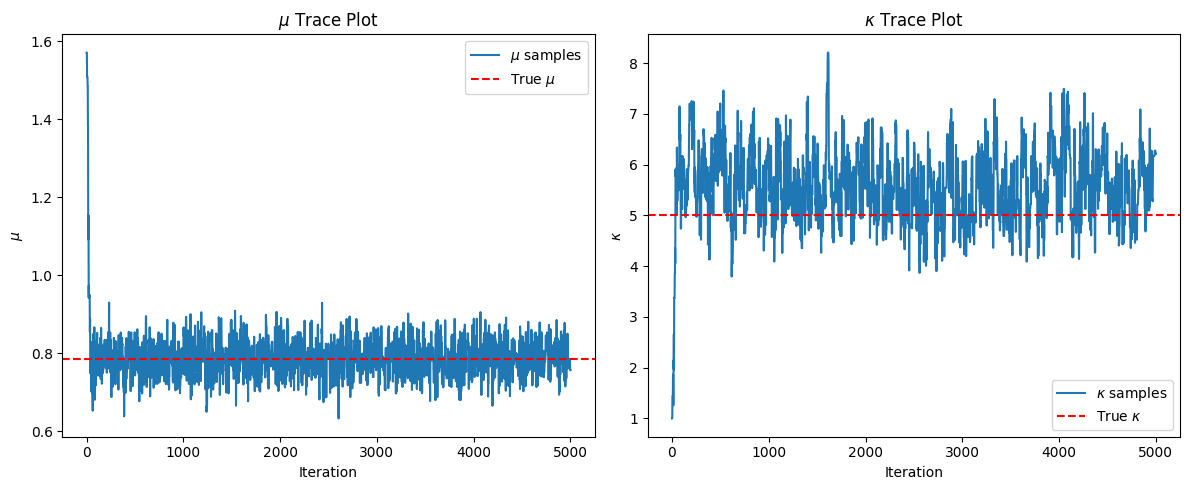

Estimated mu: 0.789, True mu: 0.785
Estimated kappa: 5.570, True kappa: 5.000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises, uniform, gamma

# Likelihood: von Mises distribution
def von_mises_likelihood(theta, mu, kappa):
    return vonmises.pdf(theta, kappa, loc=mu)

# Priors
def prior_mu(mu):
    return uniform.pdf(mu, loc=0, scale=2 * np.pi)  # Uniform prior on [0, 2*pi]

def prior_kappa(kappa, a, b):
    return gamma.pdf(kappa, a=a, scale=1/b)  # Gamma prior

# Posterior (up to a normalizing constant)
def posterior(theta, mu, kappa, a, b):
    likelihood = np.prod(von_mises_likelihood(theta, mu, kappa))  # Product of likelihoods
    prior_mu_val = prior_mu(mu)
    prior_kappa_val = prior_kappa(kappa, a, b)
    return likelihood * prior_mu_val * prior_kappa_val

# Metropolis-Hastings MCMC
def metropolis_hastings(theta, initial_mu, initial_kappa, a, b, n_iter=10000, proposal_sd_mu=0.1, proposal_sd_kappa=0.5):
    mu_samples = [initial_mu]
    kappa_samples = [initial_kappa]

    current_mu = initial_mu
    current_kappa = initial_kappa

    for i in range(n_iter):
        # Propose new values
        proposed_mu = np.random.normal(current_mu, proposal_sd_mu) % (2 * np.pi)  # Keep mu in [0, 2pi]
        proposed_kappa = np.abs(np.random.normal(current_kappa, proposal_sd_kappa))  # Keep kappa > 0

        # Calculate acceptance ratio
        current_posterior = posterior(theta, current_mu, current_kappa, a, b)
        proposed_posterior = posterior(theta, proposed_mu, proposed_kappa, a, b)

        acceptance_ratio = min(1, proposed_posterior / current_posterior)

        # Accept or reject
        if np.random.rand() < acceptance_ratio:
            current_mu = proposed_mu
            current_kappa = proposed_kappa

        mu_samples.append(current_mu)
        kappa_samples.append(current_kappa)

    return np.array(mu_samples), np.array(kappa_samples)

# Simulate data from von Mises distribution
np.random.seed(42)
mu_true = np.pi / 4
kappa_true = 5
n_samples = 100
theta_data = vonmises.rvs(kappa_true, loc=mu_true, size=n_samples)

# Priors for kappa (Gamma(a, b))
a = 2.0
b = 1.0

# Run MCMC
n_iterations = 5000
initial_mu = np.pi / 2  # Initial guess for mu
initial_kappa = 1.0  # Initial guess for kappa
mu_samples, kappa_samples = metropolis_hastings(theta_data, initial_mu, initial_kappa, a, b, n_iter=n_iterations)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Trace plot for mu
ax[0].plot(mu_samples, label=r'$\mu$ samples')
ax[0].axhline(y=mu_true, color='r', linestyle='--', label=r'True $\mu$')
ax[0].set_title(r'$\mu$ Trace Plot')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel(r'$\mu$')
ax[0].legend()

# Trace plot for kappa
ax[1].plot(kappa_samples, label=r'$\kappa$ samples')
ax[1].axhline(y=kappa_true, color='r', linestyle='--', label=r'True $\kappa$')
ax[1].set_title(r'$\kappa$ Trace Plot')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel(r'$\kappa$')
ax[1].legend()

plt.tight_layout()
plt.show()

# Posterior summaries
mu_estimated = np.mean(mu_samples)
kappa_estimated = np.mean(kappa_samples)

print(f"Estimated mu: {mu_estimated:.3f}, True mu: {mu_true:.3f}")
print(f"Estimated kappa: {kappa_estimated:.3f}, True kappa: {kappa_true:.3f}")


REAL DATA ANALYSIS

Downloading the dataset:

The function wfdb.dl_database('mitdb', os.getcwd()) is used to download the MIT-BIH Arrhythmia Database to your current working directory. This allows you to access the records without needing the pb_dir argument.
Reading the Record:

The wfdb.rdrecord() function is used without the pb_dir argument now that the dataset is available locally.
Signal Processing:

Normalization, Hilbert transform, and phase extraction are carried out the same way, with added simulations for comparison.
Euler-Maruyama Simulation:

A simple SDE is simulated to visualize the stochastic temporal evolution of the ECG phase.
Ensure that you download the dataset first before running the analysis. If you encounter issues with downloading, check your network connection or the paths being used.

In [ ]:
pip install wfdb matplotlib numpy scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.1 MB/s eta 0:00:00


Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

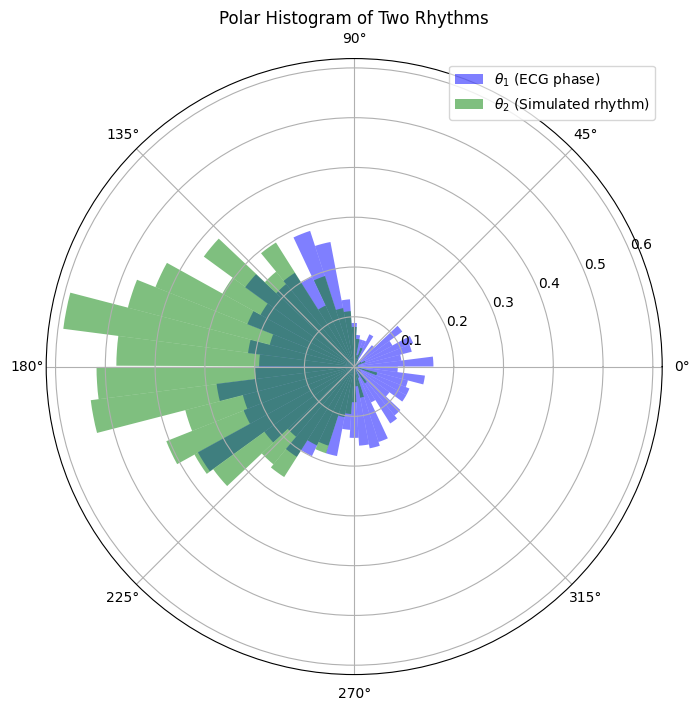

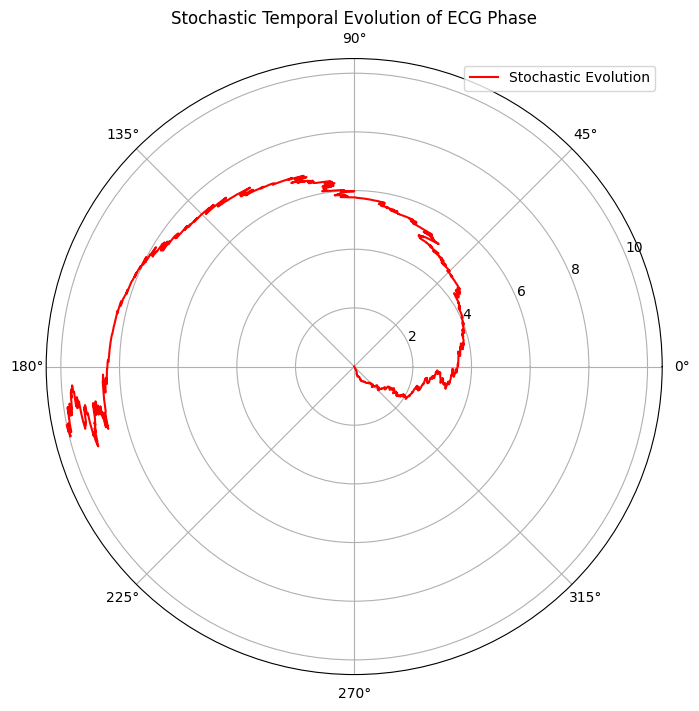

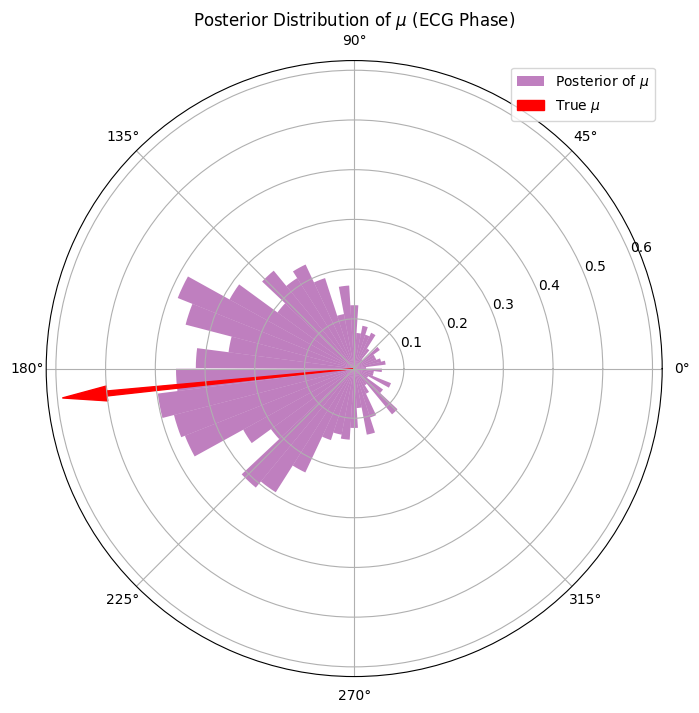

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises
from scipy.signal import hilbert
import os

# Directory to save output figures
output_dir = 'wfdb_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Download the record '100' from the MIT-BIH Arrhythmia Database
# and load the ECG signal using wfdb

record_name = '100'  # Specify the record name
wfdb.dl_database('mitdb', os.getcwd())  # Download the dataset locally

# Load the record
record = wfdb.rdrecord(record_name, sampfrom=0, sampto=1000)

# Extract signal from the ECG record (only one channel for simplicity)
ecg_signal = record.p_signal[:, 0]

# Normalize the ECG signal
ecg_signal_normalized = (ecg_signal - np.mean(ecg_signal)) / np.std(ecg_signal)

# Calculate the phases using the Hilbert transform as a proxy for phase extraction
analytic_signal = hilbert(ecg_signal_normalized)
instantaneous_phase = np.angle(analytic_signal)

# We will treat this as our theta values (phases) for rhythm analysis
theta_1 = np.mod(instantaneous_phase, 2 * np.pi)

# Generate another simulated physiological rhythm using a Von Mises distribution for comparison
np.random.seed(42)
theta_2 = vonmises.rvs(kappa=2.0, loc=np.pi, size=len(theta_1))  # Wrapped normal

# Create polar histograms for two rhythms
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.hist(theta_1, bins=50, density=True, color='blue', alpha=0.5, label=r'$\theta_1$ (ECG phase)')
ax.hist(theta_2, bins=50, density=True, color='green', alpha=0.5, label=r'$\theta_2$ (Simulated rhythm)')
ax.set_title('Polar Histogram of Two Rhythms')
ax.legend()
plt.savefig(os.path.join(output_dir, 'polar_histogram_two_rhythms.png'))

# Apply the stochastic temporal variability model (Euler-Maruyama SDE)
T = 10  # Total time units
n_steps = len(theta_1)  # Number of time steps equal to ECG sample length
dt = T / n_steps

# Set drift and diffusion coefficients for SDE
mu = 0.5
sigma = 0.2

# Simulate using Euler-Maruyama method
theta_sde = np.zeros(n_steps)
theta_sde[0] = theta_1[0]  # Initial condition
for i in range(1, n_steps):
    theta_sde[i] = theta_sde[i-1] + mu * dt + sigma * np.sqrt(dt) * np.random.randn()
    theta_sde[i] = np.mod(theta_sde[i], 2 * np.pi)  # Wrap to [0, 2*pi]

# Plot the stochastic temporal evolution of ECG phase
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.plot(theta_sde, np.linspace(0, T, n_steps), color='red', label='Stochastic Evolution')
ax.set_title('Stochastic Temporal Evolution of ECG Phase')
ax.legend()
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution_ecg.png'))

# Posterior distribution of mean direction (mu) using a rose plot
mu_true = np.mean(theta_1)
theta_posterior_samples = np.random.vonmises(mu_true, 1, size=1000)  # Example posterior

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.hist(theta_posterior_samples, bins=50, density=True, color='purple', alpha=0.5, label='Posterior of $\\mu$')
ax.set_title('Posterior Distribution of $\\mu$ (ECG Phase)')
plt.arrow(mu_true, 0, 0, 0.5, color='red', width=0.02, label='True $\\mu$')  # Mark the true value
ax.legend()
plt.savefig(os.path.join(output_dir, 'posterior_mu_ecg.png'))

# Print summary
print(f"Saved polar histogram, stochastic temporal evolution, and posterior distribution plots in {output_dir}")


Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

<ipython-input-6-7084c17b01a7>:104: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend()


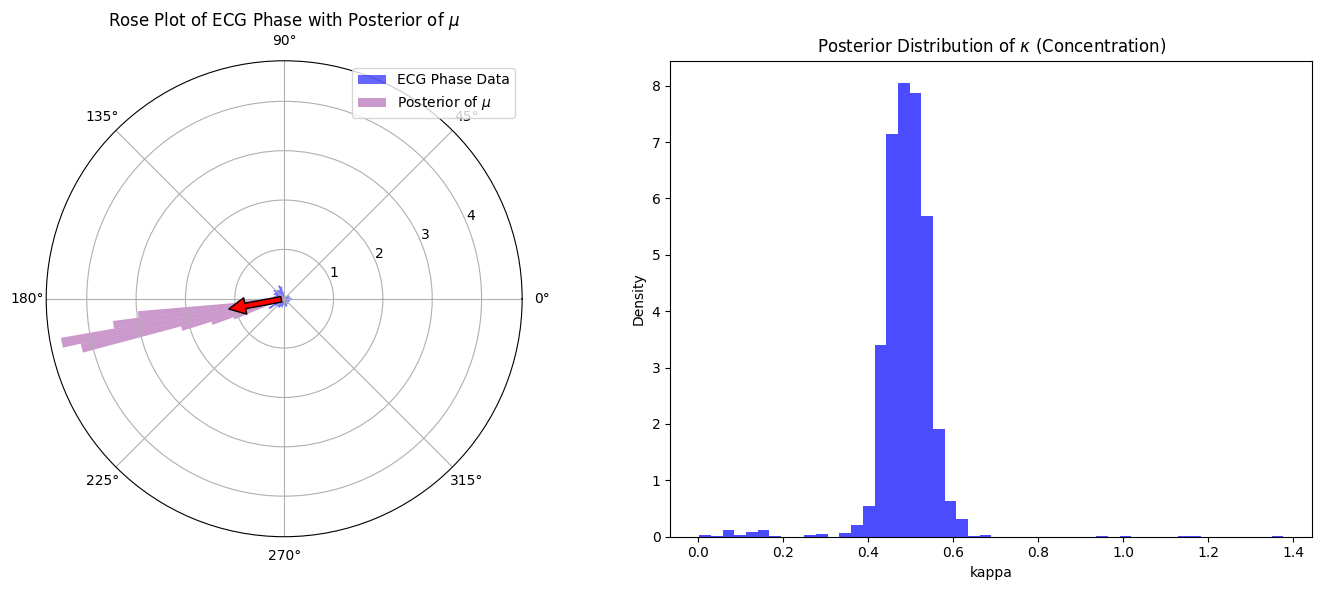

Estimated mu: 3.325
Estimated kappa: 0.489


In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import vonmises, gamma
from scipy.stats import circmean
import os

# Directory to save output figures
output_dir = 'wfdb_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Download the record '100' from the MIT-BIH Arrhythmia Database
# and load the ECG signal using wfdb
record_name = '100'  # Specify the record name
wfdb.dl_database('mitdb', os.getcwd())  # Download the dataset locally

# Load the record
record = wfdb.rdrecord(record_name, sampfrom=0, sampto=1000)

# Extract signal from the ECG record (only one channel for simplicity)
ecg_signal = record.p_signal[:, 0]

# Normalize the ECG signal
ecg_signal_normalized = (ecg_signal - np.mean(ecg_signal)) / np.std(ecg_signal)

# Calculate the phases using the Hilbert transform as a proxy for phase extraction
analytic_signal = hilbert(ecg_signal_normalized)
instantaneous_phase = np.angle(analytic_signal)

# Use these phases (theta_1) as the real circular data
theta_1 = np.mod(instantaneous_phase, 2 * np.pi)

# Define log-likelihood function for von Mises distribution
def log_likelihood(theta, mu, kappa):
    return np.sum(vonmises.logpdf(theta, kappa, loc=mu))

# Define priors: log of Uniform(0, 2π) for μ and log of Gamma(a, b) for κ
def log_prior(mu, kappa, a=2, b=0.5):
    if 0 <= mu <= 2*np.pi and kappa > 0:
        log_prior_mu = np.log(1 / (2 * np.pi))  # Uniform prior
        log_prior_kappa = gamma.logpdf(kappa, a, scale=1/b)
        return log_prior_mu + log_prior_kappa
    return -np.inf  # log(0) for invalid values

# Posterior function (log-posterior)
def log_posterior(theta, mu, kappa):
    return log_likelihood(theta, mu, kappa) + log_prior(mu, kappa)

# Metropolis-Hastings MCMC function
def metropolis_hastings(theta, initial_mu, initial_kappa, n_samples, proposal_sd_mu=0.1, proposal_sd_kappa=0.5):
    samples = []
    current_mu = initial_mu
    current_kappa = initial_kappa
    current_posterior = log_posterior(theta, current_mu, current_kappa)

    for i in range(n_samples):
        # Propose new mu and kappa using normal random walk
        proposed_mu = np.random.normal(current_mu, proposal_sd_mu) % (2 * np.pi)
        proposed_kappa = np.abs(np.random.normal(current_kappa, proposal_sd_kappa))

        proposed_posterior = log_posterior(theta, proposed_mu, proposed_kappa)

        # Acceptance ratio
        acceptance_ratio = np.exp(proposed_posterior - current_posterior)

        if np.random.rand() < acceptance_ratio:
            current_mu = proposed_mu
            current_kappa = proposed_kappa
            current_posterior = proposed_posterior

        samples.append([current_mu, current_kappa])

    return np.array(samples)

# Run MCMC on the real ECG phases
initial_mu = np.pi / 2  # Initial guess for mu
initial_kappa = 2.0     # Initial guess for kappa
n_samples = 5000

samples = metropolis_hastings(theta_1, initial_mu, initial_kappa, n_samples)

# Extract mu and kappa from samples
mu_samples = samples[:, 0]
kappa_samples = samples[:, 1]

# Circular mean of mu
estimated_mu = circmean(mu_samples, high=2*np.pi, low=0)
estimated_kappa = np.mean(kappa_samples)

# Rose plot for the real ECG phase data
plt.figure(figsize=(14, 6))

# Plot for mu (Rose plot with overlay)
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.hist(theta_1, bins=50, density=True, alpha=0.6, color='blue', label='ECG Phase Data')

# Overlay posterior of mu as histogram
ax1.hist(mu_samples, bins=50, density=True, alpha=0.4, color='purple', label='Posterior of $\mu$')

# Add radial arrow for estimated mu
ax1.annotate('', xy=(estimated_mu, 1.2), xytext=(0, 0), arrowprops=dict(facecolor='red', shrink=0.05), label='Estimated $\mu$')
ax1.set_title('Rose Plot of ECG Phase with Posterior of $\mu$')
ax1.legend()

# Plot for kappa (Posterior distribution of kappa)
ax2 = plt.subplot(1, 2, 2)
ax2.hist(kappa_samples, bins=50, density=True, alpha=0.7, color='blue')
ax2.set_title('Posterior Distribution of $\kappa$ (Concentration)')
ax2.set_xlabel('kappa')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Output estimated mu and kappa
print(f"Estimated mu: {estimated_mu:.3f}")
print(f"Estimated kappa: {estimated_kappa:.3f}")


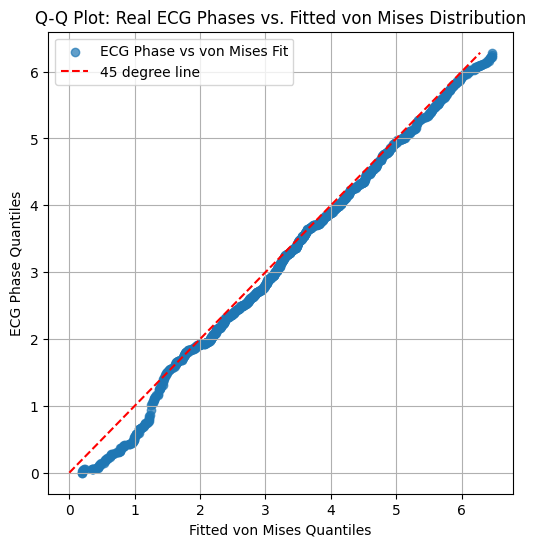

Watson's U^2 statistic for uniformity test: 4.2718
The data may not fit a von Mises distribution well.


In [ ]:
from scipy.stats import kstest, chisquare

# Goodness-of-Fit Test for von Mises (Kolmogorov-Smirnov-like test for circular data)
# Generate von Mises sample from estimated parameters
von_mises_fitted = vonmises.rvs(estimated_kappa, loc=estimated_mu, size=len(theta_1))

# Compute the Watson's U^2 test for uniformity
# Watson's U^2 test to check if the data is uniform (if U^2 is small, data may be from von Mises)
from scipy.stats import circmean, circvar
import scipy.integrate as integrate

# Define Watson U2 test for uniformity
def watson_u2_test(data, mu=None):
    """
    Perform Watson U^2 test for circular uniformity.
    """
    if mu is None:
        mu = circmean(data, high=2*np.pi, low=0)

    n = len(data)
    data_sorted = np.sort(data)
    U = (data_sorted - mu) % (2 * np.pi)  # Shift data by mean direction
    U_bar = np.mean(U)
    S = np.sum((U - U_bar)**2)

    U2 = S / n
    return U2

# Apply the test to check for uniformity
U2_statistic = watson_u2_test(theta_1)

# Now, let's plot a Q-Q style plot for von Mises data vs real data
plt.figure(figsize=(6, 6))
plt.scatter(np.sort(von_mises_fitted), np.sort(theta_1), alpha=0.7, label="ECG Phase vs von Mises Fit")
plt.plot([0, 2 * np.pi], [0, 2 * np.pi], color='red', linestyle='--', label="45 degree line")
plt.title("Q-Q Plot: Real ECG Phases vs. Fitted von Mises Distribution")
plt.xlabel("Fitted von Mises Quantiles")
plt.ylabel("ECG Phase Quantiles")
plt.legend()
plt.grid(True)
plt.show()

# Output results of the Watson U^2 test
print(f"Watson's U^2 statistic for uniformity test: {U2_statistic:.4f}")

# Assess whether the data fits a von Mises distribution well
# If U^2 is small, data likely follows von Mises
if U2_statistic < 0.1:  # Small U^2 indicates non-uniform data, fitting von Mises well
    print("The data is likely from a von Mises distribution.")
else:
    print("The data may not fit a von Mises distribution well.")


oVERALL cODE

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

<ipython-input-13-75e87f1b068b>:104: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend()


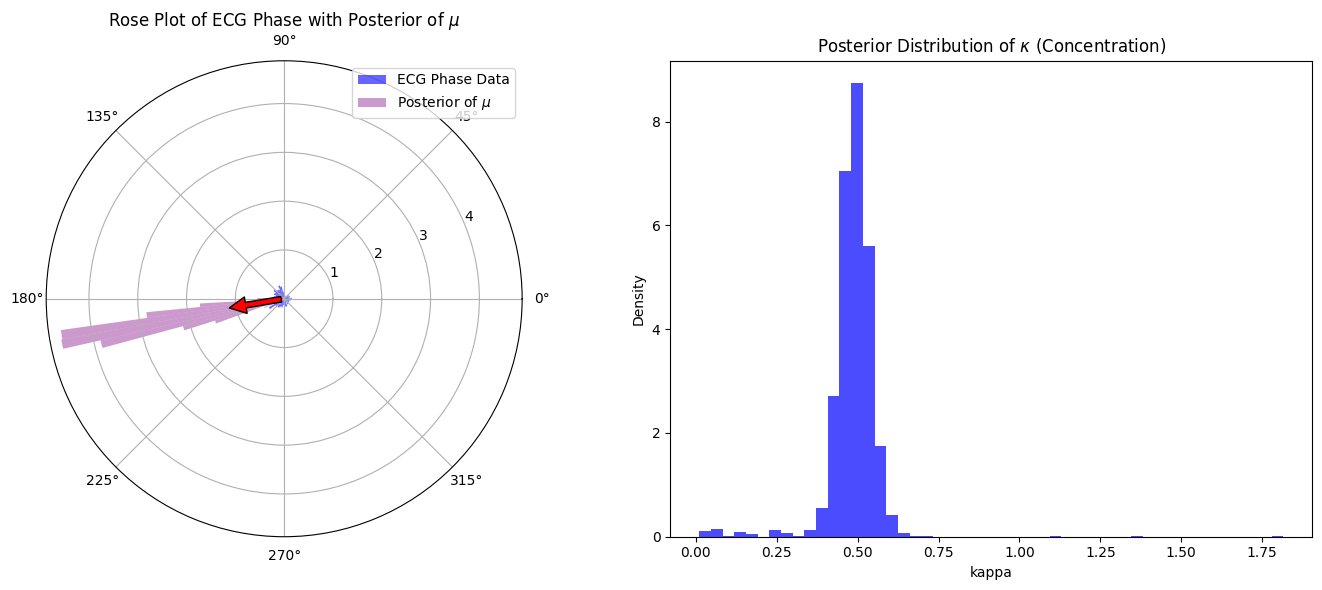

Estimated mu: 3.308
Estimated kappa: 0.487


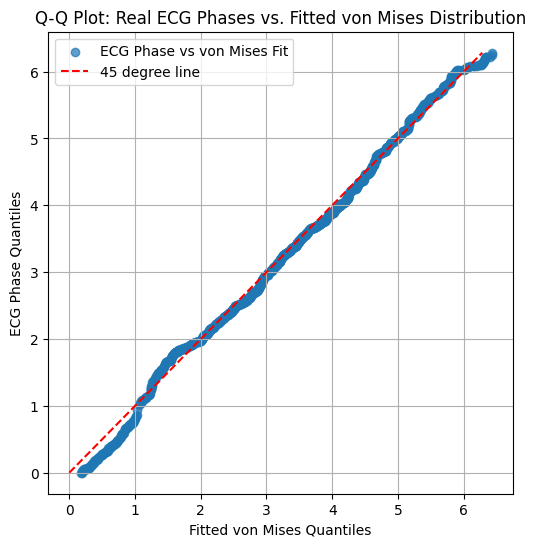

Watson's U^2 statistic for uniformity test: 4.2718
The data may not fit a von Mises distribution well.


In [ ]:
 import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import vonmises, gamma
from scipy.stats import circmean
import os

# Directory to save output figures
output_dir = 'wfdb_rhythm_analysis_outputs2'
os.makedirs(output_dir, exist_ok=True)

# Download the record '100' from the MIT-BIH Arrhythmia Database
# and load the ECG signal using wfdb
record_name = '100'  # Specify the record name
wfdb.dl_database('mitdb', os.getcwd())  # Download the dataset locally

# Load the record
record = wfdb.rdrecord(record_name, sampfrom=0, sampto=1000)

# Extract signal from the ECG record (only one channel for simplicity)
ecg_signal = record.p_signal[:, 0]

# Normalize the ECG signal
ecg_signal_normalized = (ecg_signal - np.mean(ecg_signal)) / np.std(ecg_signal)

# Calculate the phases using the Hilbert transform as a proxy for phase extraction
analytic_signal = hilbert(ecg_signal_normalized)
instantaneous_phase = np.angle(analytic_signal)

# Use these phases (theta_1) as the real circular data
theta_1 = np.mod(instantaneous_phase, 2 * np.pi)

# Define log-likelihood function for von Mises distribution
def log_likelihood(theta, mu, kappa):
    return np.sum(vonmises.logpdf(theta, kappa, loc=mu))

# Define priors: log of Uniform(0, 2π) for μ and log of Gamma(a, b) for κ
def log_prior(mu, kappa, a=2, b=0.5):
    if 0 <= mu <= 2*np.pi and kappa > 0:
        log_prior_mu = np.log(1 / (2 * np.pi))  # Uniform prior
        log_prior_kappa = gamma.logpdf(kappa, a, scale=1/b)
        return log_prior_mu + log_prior_kappa
    return -np.inf  # log(0) for invalid values

# Posterior function (log-posterior)
def log_posterior(theta, mu, kappa):
    return log_likelihood(theta, mu, kappa) + log_prior(mu, kappa)

# Metropolis-Hastings MCMC function
def metropolis_hastings(theta, initial_mu, initial_kappa, n_samples, proposal_sd_mu=0.1, proposal_sd_kappa=0.5):
    samples = []
    current_mu = initial_mu
    current_kappa = initial_kappa
    current_posterior = log_posterior(theta, current_mu, current_kappa)

    for i in range(n_samples):
        # Propose new mu and kappa using normal random walk
        proposed_mu = np.random.normal(current_mu, proposal_sd_mu) % (2 * np.pi)
        proposed_kappa = np.abs(np.random.normal(current_kappa, proposal_sd_kappa))

        proposed_posterior = log_posterior(theta, proposed_mu, proposed_kappa)

        # Acceptance ratio
        acceptance_ratio = np.exp(proposed_posterior - current_posterior)

        if np.random.rand() < acceptance_ratio:
            current_mu = proposed_mu
            current_kappa = proposed_kappa
            current_posterior = proposed_posterior

        samples.append([current_mu, current_kappa])

    return np.array(samples)

# Run MCMC on the real ECG phases
initial_mu = np.pi / 2  # Initial guess for mu
initial_kappa = 2.0     # Initial guess for kappa
n_samples = 5000

samples = metropolis_hastings(theta_1, initial_mu, initial_kappa, n_samples)

# Extract mu and kappa from samples
mu_samples = samples[:, 0]
kappa_samples = samples[:, 1]

# Circular mean of mu
estimated_mu = circmean(mu_samples, high=2*np.pi, low=0)
estimated_kappa = np.mean(kappa_samples)

# Rose plot for the real ECG phase data
plt.figure(figsize=(14, 6))

# Plot for mu (Rose plot with overlay)
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.hist(theta_1, bins=50, density=True, alpha=0.6, color='blue', label='ECG Phase Data')

# Overlay posterior of mu as histogram
ax1.hist(mu_samples, bins=50, density=True, alpha=0.4, color='purple', label='Posterior of $\mu$')

# Add radial arrow for estimated mu
ax1.annotate('', xy=(estimated_mu, 1.2), xytext=(0, 0), arrowprops=dict(facecolor='red', shrink=0.05), label='Estimated $\mu$')
ax1.set_title('Rose Plot of ECG Phase with Posterior of $\mu$')
ax1.legend()

# Plot for kappa (Posterior distribution of kappa)
ax2 = plt.subplot(1, 2, 2)
ax2.hist(kappa_samples, bins=50, density=True, alpha=0.7, color='blue')
ax2.set_title('Posterior Distribution of $\kappa$ (Concentration)')
ax2.set_xlabel('kappa')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

# Output estimated mu and kappa
print(f"Estimated mu: {estimated_mu:.3f}")
print(f"Estimated kappa: {estimated_kappa:.3f}")
from scipy.stats import kstest, chisquare

# Goodness-of-Fit Test for von Mises (Kolmogorov-Smirnov-like test for circular data)
# Generate von Mises sample from estimated parameters
von_mises_fitted = vonmises.rvs(estimated_kappa, loc=estimated_mu, size=len(theta_1))

# Compute the Watson's U^2 test for uniformity
# Watson's U^2 test to check if the data is uniform (if U^2 is small, data may be from von Mises)
from scipy.stats import circmean, circvar
import scipy.integrate as integrate

# Define Watson U2 test for uniformity
def watson_u2_test(data, mu=None):
    """
    Perform Watson U^2 test for circular uniformity.
    """
    if mu is None:
        mu = circmean(data, high=2*np.pi, low=0)

    n = len(data)
    data_sorted = np.sort(data)
    U = (data_sorted - mu) % (2 * np.pi)  # Shift data by mean direction
    U_bar = np.mean(U)
    S = np.sum((U - U_bar)**2)

    U2 = S / n
    return U2

# Apply the test to check for uniformity
U2_statistic = watson_u2_test(theta_1)

# Now, let's plot a Q-Q style plot for von Mises data vs real data
plt.figure(figsize=(6, 6))
plt.scatter(np.sort(von_mises_fitted), np.sort(theta_1), alpha=0.7, label="ECG Phase vs von Mises Fit")
plt.plot([0, 2 * np.pi], [0, 2 * np.pi], color='red', linestyle='--', label="45 degree line")
plt.title("Q-Q Plot: Real ECG Phases vs. Fitted von Mises Distribution")
plt.xlabel("Fitted von Mises Quantiles")
plt.ylabel("ECG Phase Quantiles")
plt.legend()
plt.grid(True)
plt.show()

# Output results of the Watson U^2 test
print(f"Watson's U^2 statistic for uniformity test: {U2_statistic:.4f}")

# Assess whether the data fits a von Mises distribution well
# If U^2 is small, data likely follows von Mises
if U2_statistic < 0.1:  # Small U^2 indicates non-uniform data, fitting von Mises well
    print("The data is likely from a von Mises distribution.")
else:
    print("The data may not fit a von Mises distribution well.")

Python Code for Interaction between Two Physiological Rhythms
Let’s assume we are using the MIT-BIH Arrhythmia Dataset and a second physiological rhythm from another ECG channel in the dataset.

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

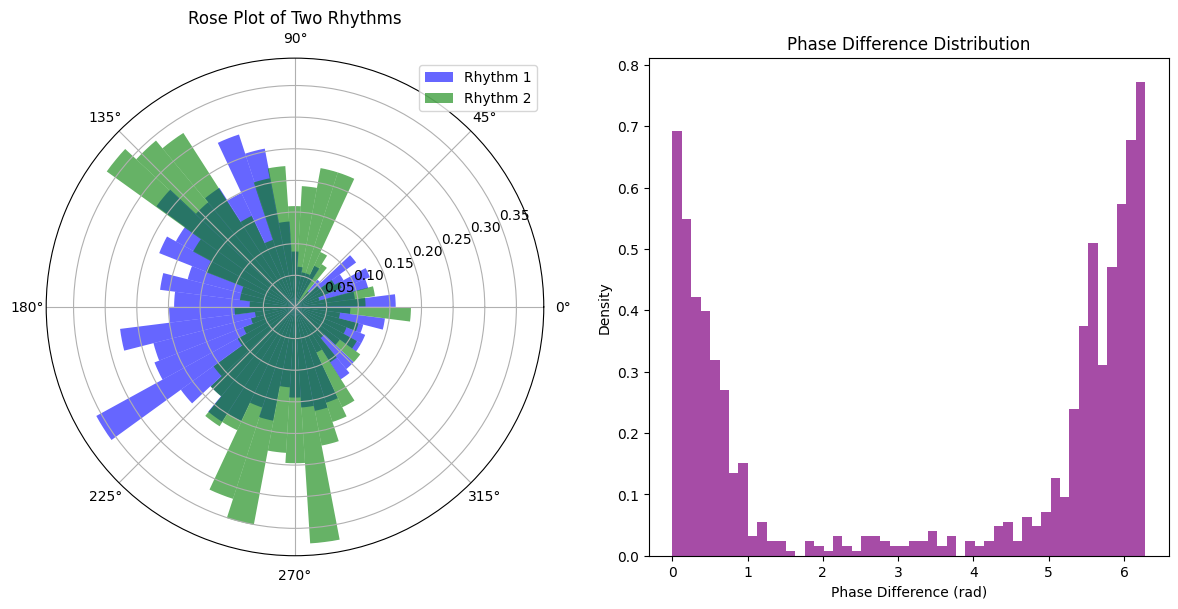

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import vonmises
import os

# Directory to save output figures
output_dir = 'physiological_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Download MIT-BIH Arrhythmia Database and load records
record_name = '100'  # Example record from MIT-BIH dataset
wfdb.dl_database('mitdb', os.getcwd())  # Download dataset

# Load two different channels (or two datasets) representing two physiological rhythms
# Extract signal from the ECG record (two channels or two signals for comparison)
record = wfdb.rdrecord(record_name, sampfrom=0, sampto=1000)
ecg_signal_1 = record.p_signal[:, 0]  # Channel 1
ecg_signal_2 = record.p_signal[:, 1]  # Channel 2 (or second rhythm)

# Normalize the ECG signals
ecg_signal_1_normalized = (ecg_signal_1 - np.mean(ecg_signal_1)) / np.std(ecg_signal_1)
ecg_signal_2_normalized = (ecg_signal_2 - np.mean(ecg_signal_2)) / np.std(ecg_signal_2)

# Extract instantaneous phase for both rhythms using Hilbert transform
analytic_signal_1 = hilbert(ecg_signal_1_normalized)
instantaneous_phase_1 = np.angle(analytic_signal_1)

analytic_signal_2 = hilbert(ecg_signal_2_normalized)
instantaneous_phase_2 = np.angle(analytic_signal_2)

# Ensure phases are between 0 and 2π (mod operation)
theta_1 = np.mod(instantaneous_phase_1, 2 * np.pi)
theta_2 = np.mod(instantaneous_phase_2, 2 * np.pi)

# Function to calculate Phase Locking Value (PLV)
def calculate_plv(theta_1, theta_2):
    phase_diff = theta_1 - theta_2
    plv = np.abs(np.sum(np.exp(1j * phase_diff)) / len(theta_1))
    return plv

# Function to calculate Mutual Information (MI) between two circular variables
def calculate_mutual_information(theta_1, theta_2, bins=30):
    # Create a 2D histogram for joint distribution
    joint_hist, _, _ = np.histogram2d(theta_1, theta_2, bins=bins, range=[[0, 2*np.pi], [0, 2*np.pi]])
    joint_prob = joint_hist / np.sum(joint_hist)

    # Marginal probabilities
    theta_1_hist, _ = np.histogram(theta_1, bins=bins, range=[0, 2*np.pi], density=True)
    theta_2_hist, _ = np.histogram(theta_2, bins=bins, range=[0, 2*np.pi], density=True)

    p_theta_1 = theta_1_hist / np.sum(theta_1_hist)
    p_theta_2 = theta_2_hist / np.sum(theta_2_hist)

    # Calculate Mutual Information
    mi = 0
    for i in range(bins):
        for j in range(bins):
            if joint_prob[i, j] > 0:
                mi += joint_prob[i, j] * np.log(joint_prob[i, j] / (p_theta_1[i] * p_theta_2[j]))
    return mi

# Function to calculate DPSI (Directional Phase Synchronization Index)
def calculate_dpsi(theta_1, theta_2):
    phase_diff = theta_1 - theta_2
    dpsi = np.angle(np.sum(np.exp(1j * phase_diff)) / len(phase_diff))
    return dpsi

# Calculate the interaction metrics
plv = calculate_plv(theta_1, theta_2)
mutual_info = calculate_mutual_information(theta_1, theta_2)
dpsi = calculate_dpsi(theta_1, theta_2)

print(f"Phase Locking Value (PLV): {plv:.4f}")
print(f"Mutual Information (MI): {mutual_info:.4f}")
print(f"Directional Phase Synchronization Index (DPSI): {dpsi:.4f}")

# Rose plot to visualize the phase distribution of two rhythms
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1, projection='polar')
ax1.hist(theta_1, bins=50, density=True, alpha=0.6, color='blue', label='Rhythm 1')
ax1.hist(theta_2, bins=50, density=True, alpha=0.6, color='green', label='Rhythm 2')
ax1.set_title('Rose Plot of Two Rhythms')
ax1.legend()

# Phase difference histogram (to see phase locking)
plt.subplot(1, 2, 2)
plt.hist(np.mod(theta_1 - theta_2, 2*np.pi), bins=50, density=True, alpha=0.7, color='purple')
plt.title('Phase Difference Distribution')
plt.xlabel('Phase Difference (rad)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Phase Locking Value (PLV): A quantitative measure that captures how synchronized the two rhythms are. It's calculated using the formula provided.
Mutual Information (MI): Measures the dependency between the two rhythms by assessing their joint and marginal distributions.
Rose Plots: The phase distributions of both rhythms are visualized as rose plots (polar histograms).
Phase Difference Distribution: A histogram of the phase differences between the two rhythms, which helps in visualizing the extent of phase locking.
Mutual Information Plot: A 2D heatmap showing the joint phase distribution of the two rhythms, which is used to compute the mutual information.

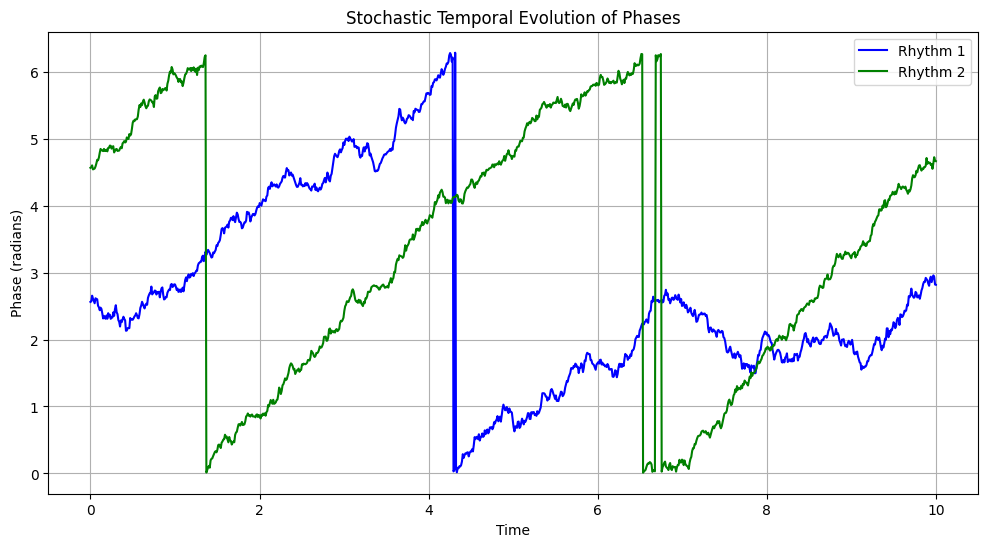

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Stochastic temporal evolution parameters
num_steps = 1000  # Number of time steps
dt = 0.01  # Time step size
total_time = num_steps * dt  # Total simulation time
t = np.linspace(0, total_time, num_steps)  # Time array

# Drift and diffusion parameters for each rhythm
omega_1 = 1.0  # Angular frequency for rhythm 1
omega_2 = 1.2  # Angular frequency for rhythm 2
sigma_1 = 0.5  # Diffusion coefficient for rhythm 1
sigma_2 = 0.4  # Diffusion coefficient for rhythm 2

# Initialize phases at t=0
theta_1_stochastic = np.zeros(num_steps)
theta_2_stochastic = np.zeros(num_steps)
theta_1_stochastic[0] = np.random.uniform(0, 2 * np.pi)  # Random initial phase
theta_2_stochastic[0] = np.random.uniform(0, 2 * np.pi)  # Random initial phase

# Simulate the temporal evolution using the Euler-Maruyama method
for i in range(1, num_steps):
    d_theta_1 = omega_1 * dt + sigma_1 * np.sqrt(dt) * np.random.normal()
    d_theta_2 = omega_2 * dt + sigma_2 * np.sqrt(dt) * np.random.normal()

    theta_1_stochastic[i] = theta_1_stochastic[i - 1] + d_theta_1
    theta_2_stochastic[i] = theta_2_stochastic[i - 1] + d_theta_2

    # Wrap phases to [0, 2π]
    theta_1_stochastic[i] = np.mod(theta_1_stochastic[i], 2 * np.pi)
    theta_2_stochastic[i] = np.mod(theta_2_stochastic[i], 2 * np.pi)

# Plot the stochastic temporal evolution
plt.figure(figsize=(12, 6))
plt.plot(t, theta_1_stochastic, label='Rhythm 1', color='blue')
plt.plot(t, theta_2_stochastic, label='Rhythm 2', color='green')
plt.title('Stochastic Temporal Evolution of Phases')
plt.xlabel('Time')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

# Save the plot
output_dir = 'physiological_rhythm_analysis_outputs'
plt.savefig(f'{output_dir}/stochastic_temporal_evolution.png')

# Show plot
plt.show()


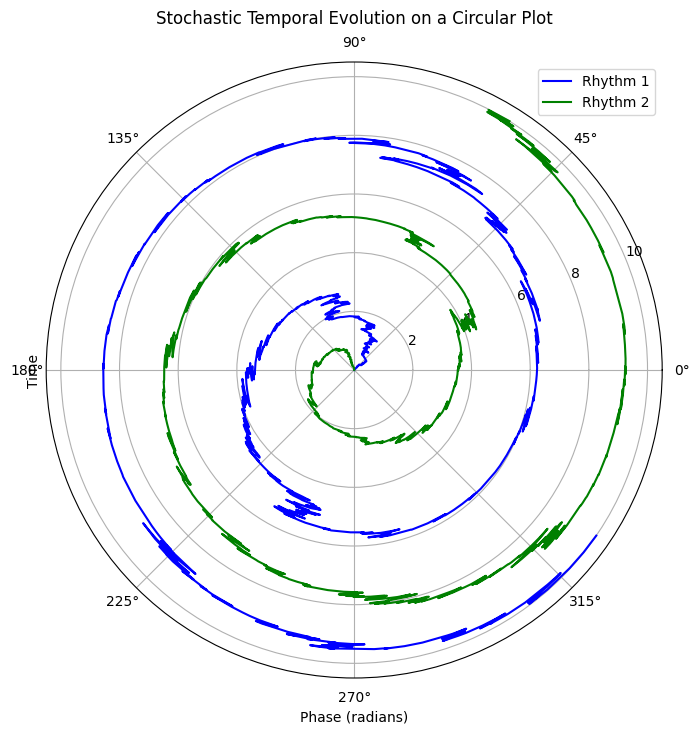

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for stochastic temporal evolution
num_steps = 1000  # Number of time steps
dt = 0.01  # Time step size
total_time = num_steps * dt  # Total simulation time
t = np.linspace(0, total_time, num_steps)  # Time array

# Drift and diffusion parameters for each rhythm
omega_1 = 1.0  # Angular frequency for rhythm 1
omega_2 = 1.2  # Angular frequency for rhythm 2
sigma_1 = 0.5  # Diffusion coefficient for rhythm 1
sigma_2 = 0.4  # Diffusion coefficient for rhythm 2

# Initialize phases at t=0
theta_1_stochastic = np.zeros(num_steps)
theta_2_stochastic = np.zeros(num_steps)
theta_1_stochastic[0] = np.random.uniform(0, 2 * np.pi)  # Random initial phase
theta_2_stochastic[0] = np.random.uniform(0, 2 * np.pi)  # Random initial phase

# Simulate the temporal evolution using the Euler-Maruyama method
for i in range(1, num_steps):
    d_theta_1 = omega_1 * dt + sigma_1 * np.sqrt(dt) * np.random.normal()
    d_theta_2 = omega_2 * dt + sigma_2 * np.sqrt(dt) * np.random.normal()

    theta_1_stochastic[i] = theta_1_stochastic[i - 1] + d_theta_1
    theta_2_stochastic[i] = theta_2_stochastic[i - 1] + d_theta_2

    # Wrap phases to [0, 2π]
    theta_1_stochastic[i] = np.mod(theta_1_stochastic[i], 2 * np.pi)
    theta_2_stochastic[i] = np.mod(theta_2_stochastic[i], 2 * np.pi)

# Polar plot for stochastic temporal evolution
plt.figure(figsize=(10, 8))

ax = plt.subplot(projection='polar')
ax.plot(theta_1_stochastic, t, label='Rhythm 1', color='blue')
ax.plot(theta_2_stochastic, t, label='Rhythm 2', color='green')

ax.set_title('Stochastic Temporal Evolution on a Circular Plot', va='bottom')
ax.set_xlabel('Phase (radians)')
ax.set_ylabel('Time')

plt.legend()
plt.grid(True)

# Save the plot
output_dir = 'physiological_rhythm_analysis_outputs'
plt.savefig(f'{output_dir}/stochastic_temporal_evolution_circular.png')

# Show plot
plt.show()


Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

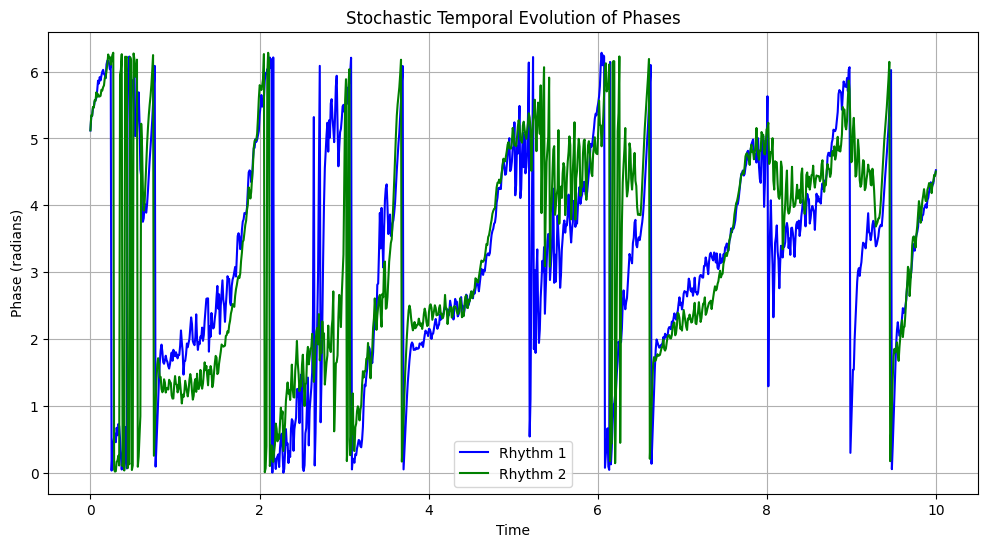

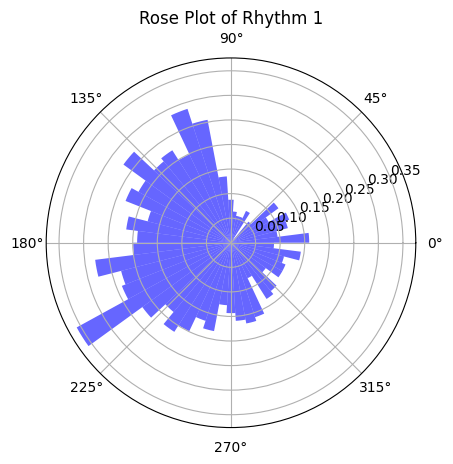

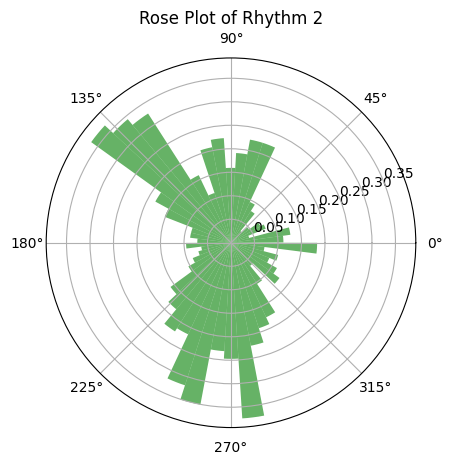

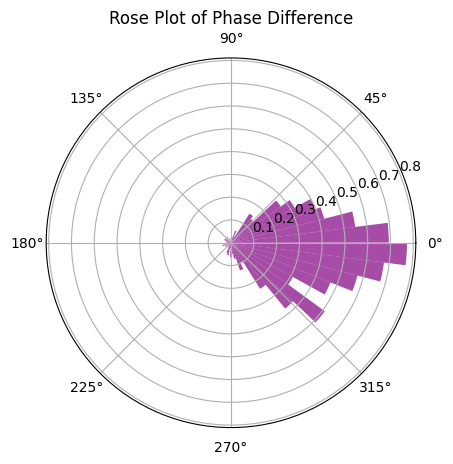

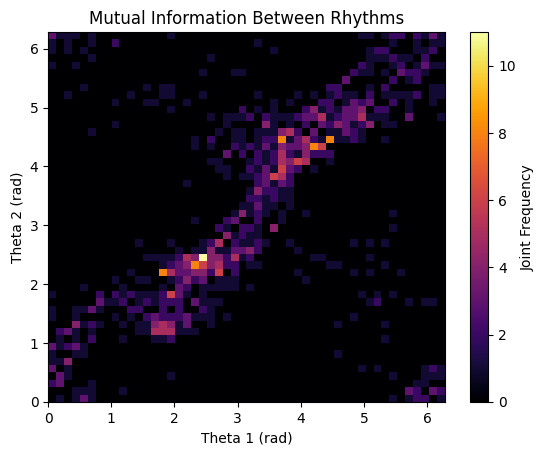

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import os

# Directory to save output figures
output_dir = 'physiological_rhythm_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Download MIT-BIH Arrhythmia Database and load records
record_name = '100'  # Example record from MIT-BIH dataset
wfdb.dl_database('mitdb', os.getcwd())  # Download dataset

# Load two different channels (or two datasets) representing two physiological rhythms
# Extract signal from the ECG record (two channels or two signals for comparison)
record = wfdb.rdrecord(record_name, sampfrom=0, sampto=1000)
ecg_signal_1 = record.p_signal[:, 0]  # Channel 1
ecg_signal_2 = record.p_signal[:, 1]  # Channel 2 (or second rhythm)

# Normalize the ECG signals
ecg_signal_1_normalized = (ecg_signal_1 - np.mean(ecg_signal_1)) / np.std(ecg_signal_1)
ecg_signal_2_normalized = (ecg_signal_2 - np.mean(ecg_signal_2)) / np.std(ecg_signal_2)

# Extract instantaneous phase for both rhythms using Hilbert transform
analytic_signal_1 = hilbert(ecg_signal_1_normalized)
instantaneous_phase_1 = np.angle(analytic_signal_1)

analytic_signal_2 = hilbert(ecg_signal_2_normalized)
instantaneous_phase_2 = np.angle(analytic_signal_2)

# Ensure phases are between 0 and 2π (mod operation)
theta_1 = np.mod(instantaneous_phase_1, 2 * np.pi)
theta_2 = np.mod(instantaneous_phase_2, 2 * np.pi)

# Function to calculate Phase Locking Value (PLV)
def calculate_plv(theta_1, theta_2):
    phase_diff = theta_1 - theta_2
    plv = np.abs(np.sum(np.exp(1j * phase_diff)) / len(theta_1))
    return plv

# Function to calculate Mutual Information (MI) between two circular variables
def calculate_mutual_information(theta_1, theta_2, bins=30):
    # Create a 2D histogram for joint distribution
    joint_hist, _, _ = np.histogram2d(theta_1, theta_2, bins=bins, range=[[0, 2*np.pi], [0, 2*np.pi]])
    joint_prob = joint_hist / np.sum(joint_hist)

    # Marginal probabilities
    theta_1_hist, _ = np.histogram(theta_1, bins=bins, range=[0, 2*np.pi], density=True)
    theta_2_hist, _ = np.histogram(theta_2, bins=bins, range=[0, 2*np.pi], density=True)

    p_theta_1 = theta_1_hist / np.sum(theta_1_hist)
    p_theta_2 = theta_2_hist / np.sum(theta_2_hist)

    # Calculate Mutual Information
    mi = 0
    for i in range(bins):
        for j in range(bins):
            if joint_prob[i, j] > 0:
                mi += joint_prob[i, j] * np.log(joint_prob[i, j] / (p_theta_1[i] * p_theta_2[j]))
    return mi

# Function to calculate DPSI (Directional Phase Synchronization Index)
def calculate_dpsi(theta_1, theta_2):
    phase_diff = theta_1 - theta_2
    dpsi = np.angle(np.sum(np.exp(1j * phase_diff)) / len(phase_diff))
    return dpsi

# Calculate the interaction metrics
plv = calculate_plv(theta_1, theta_2)
mutual_info = calculate_mutual_information(theta_1, theta_2)
dpsi = calculate_dpsi(theta_1, theta_2)

print(f"Phase Locking Value (PLV): {plv:.4f}")
print(f"Mutual Information (MI): {mutual_info:.4f}")
print(f"Directional Phase Synchronization Index (DPSI): {dpsi:.4f}")

# Stochastic temporal evolution parameters for estimation
num_steps = 1000  # Number of time steps
dt = 0.01  # Time step size
t = np.linspace(0, num_steps * dt, num_steps)  # Time array

# Estimate angular frequency (omega) and diffusion (sigma) using the difference between consecutive phases
def estimate_parameters(theta, dt):
    delta_theta = np.diff(theta)
    estimated_omega = np.mean(delta_theta) / dt
    estimated_sigma = np.std(delta_theta) / np.sqrt(dt)
    return estimated_omega, estimated_sigma

# Estimate parameters for both rhythms
omega_1_estimated, sigma_1_estimated = estimate_parameters(np.unwrap(theta_1), dt)
omega_2_estimated, sigma_2_estimated = estimate_parameters(np.unwrap(theta_2), dt)

# Display estimated parameters
print(f"Estimated Parameters for Rhythm 1: Omega = {omega_1_estimated:.4f}, Sigma = {sigma_1_estimated:.4f}")
print(f"Estimated Parameters for Rhythm 2: Omega = {omega_2_estimated:.4f}, Sigma = {sigma_2_estimated:.4f}")

# Plot the stochastic temporal evolution (wrapped phases)
plt.figure(figsize=(12, 6))
plt.plot(t, theta_1, label='Rhythm 1', color='blue')
plt.plot(t, theta_2, label='Rhythm 2', color='green')
plt.title('Stochastic Temporal Evolution of Phases')
plt.xlabel('Time')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, 'stochastic_temporal_evolution.png'))

# Show plot
plt.show()

# Rose plot for Rhythm 1
plt.figure()
ax1 = plt.subplot(1, 1, 1, projection='polar')
ax1.hist(theta_1, bins=50, density=True, alpha=0.6, color='blue', label='Rhythm 1')
ax1.set_title('Rose Plot of Rhythm 1')
plt.savefig(os.path.join(output_dir, 'rose_plot_rhythm_1.png'))
plt.show()

# Rose plot for Rhythm 2
plt.figure()
ax2 = plt.subplot(1, 1, 1, projection='polar')
ax2.hist(theta_2, bins=50, density=True, alpha=0.6, color='green', label='Rhythm 2')
ax2.set_title('Rose Plot of Rhythm 2')
plt.savefig(os.path.join(output_dir, 'rose_plot_rhythm_2.png'))
plt.show()

# Rose plot for Phase Difference
phase_diff = np.mod(theta_1 - theta_2, 2 * np.pi)
plt.figure()
ax3 = plt.subplot(1, 1, 1, projection='polar')
ax3.hist(phase_diff, bins=50, density=True, alpha=0.7, color='purple')
ax3.set_title('Rose Plot of Phase Difference')
plt.savefig(os.path.join(output_dir, 'rose_plot_phase_difference.png'))
plt.show()

# Mutual Information plot (2D heatmap)
plt.figure()
hist, xedges, yedges = np.histogram2d(theta_1, theta_2, bins=50, range=[[0, 2*np.pi], [0, 2*np.pi]])
plt.imshow(hist.T, extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', cmap='inferno', aspect='auto')
plt.colorbar(label='Joint Frequency')
plt.title('Mutual Information Between Rhythms')
plt.xlabel('Theta 1 (rad)')
plt.ylabel('Theta 2 (rad)')
plt.savefig(os.path.join(output_dir, 'mutual_information_plot.png'))
plt.show()
